## Регуляризация
#### Применить методы линейной регресии, lasso, lasso cv, ridge и ridge cv к данным и вывести MSE и коэффициенты

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model

In [2]:
data = pd.read_csv('day.csv', encoding='utf-8', sep=',')
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
data.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [4]:
data.shape

(731, 16)

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('seaborn-poster')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

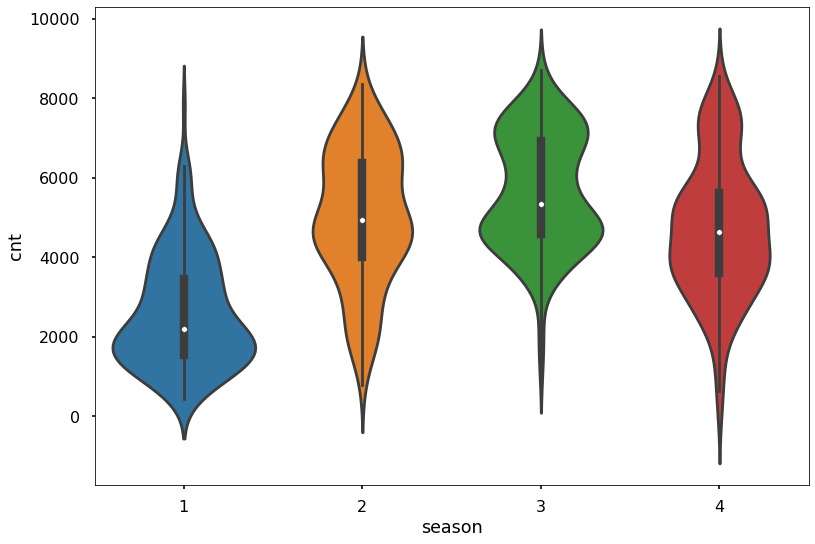

In [7]:
sns.violinplot(data['season'], data['cnt'])

<AxesSubplot:>

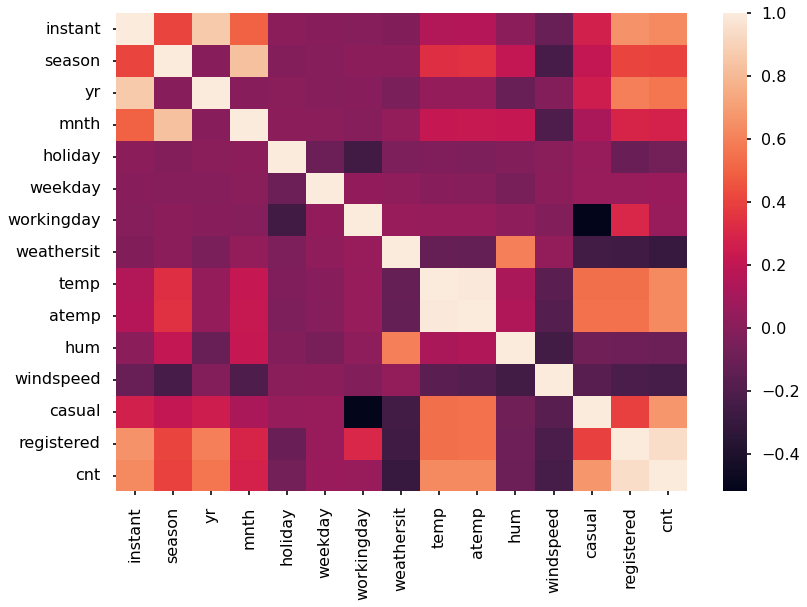

In [8]:
hm = sns.heatmap(data.corr(),
                )
hm

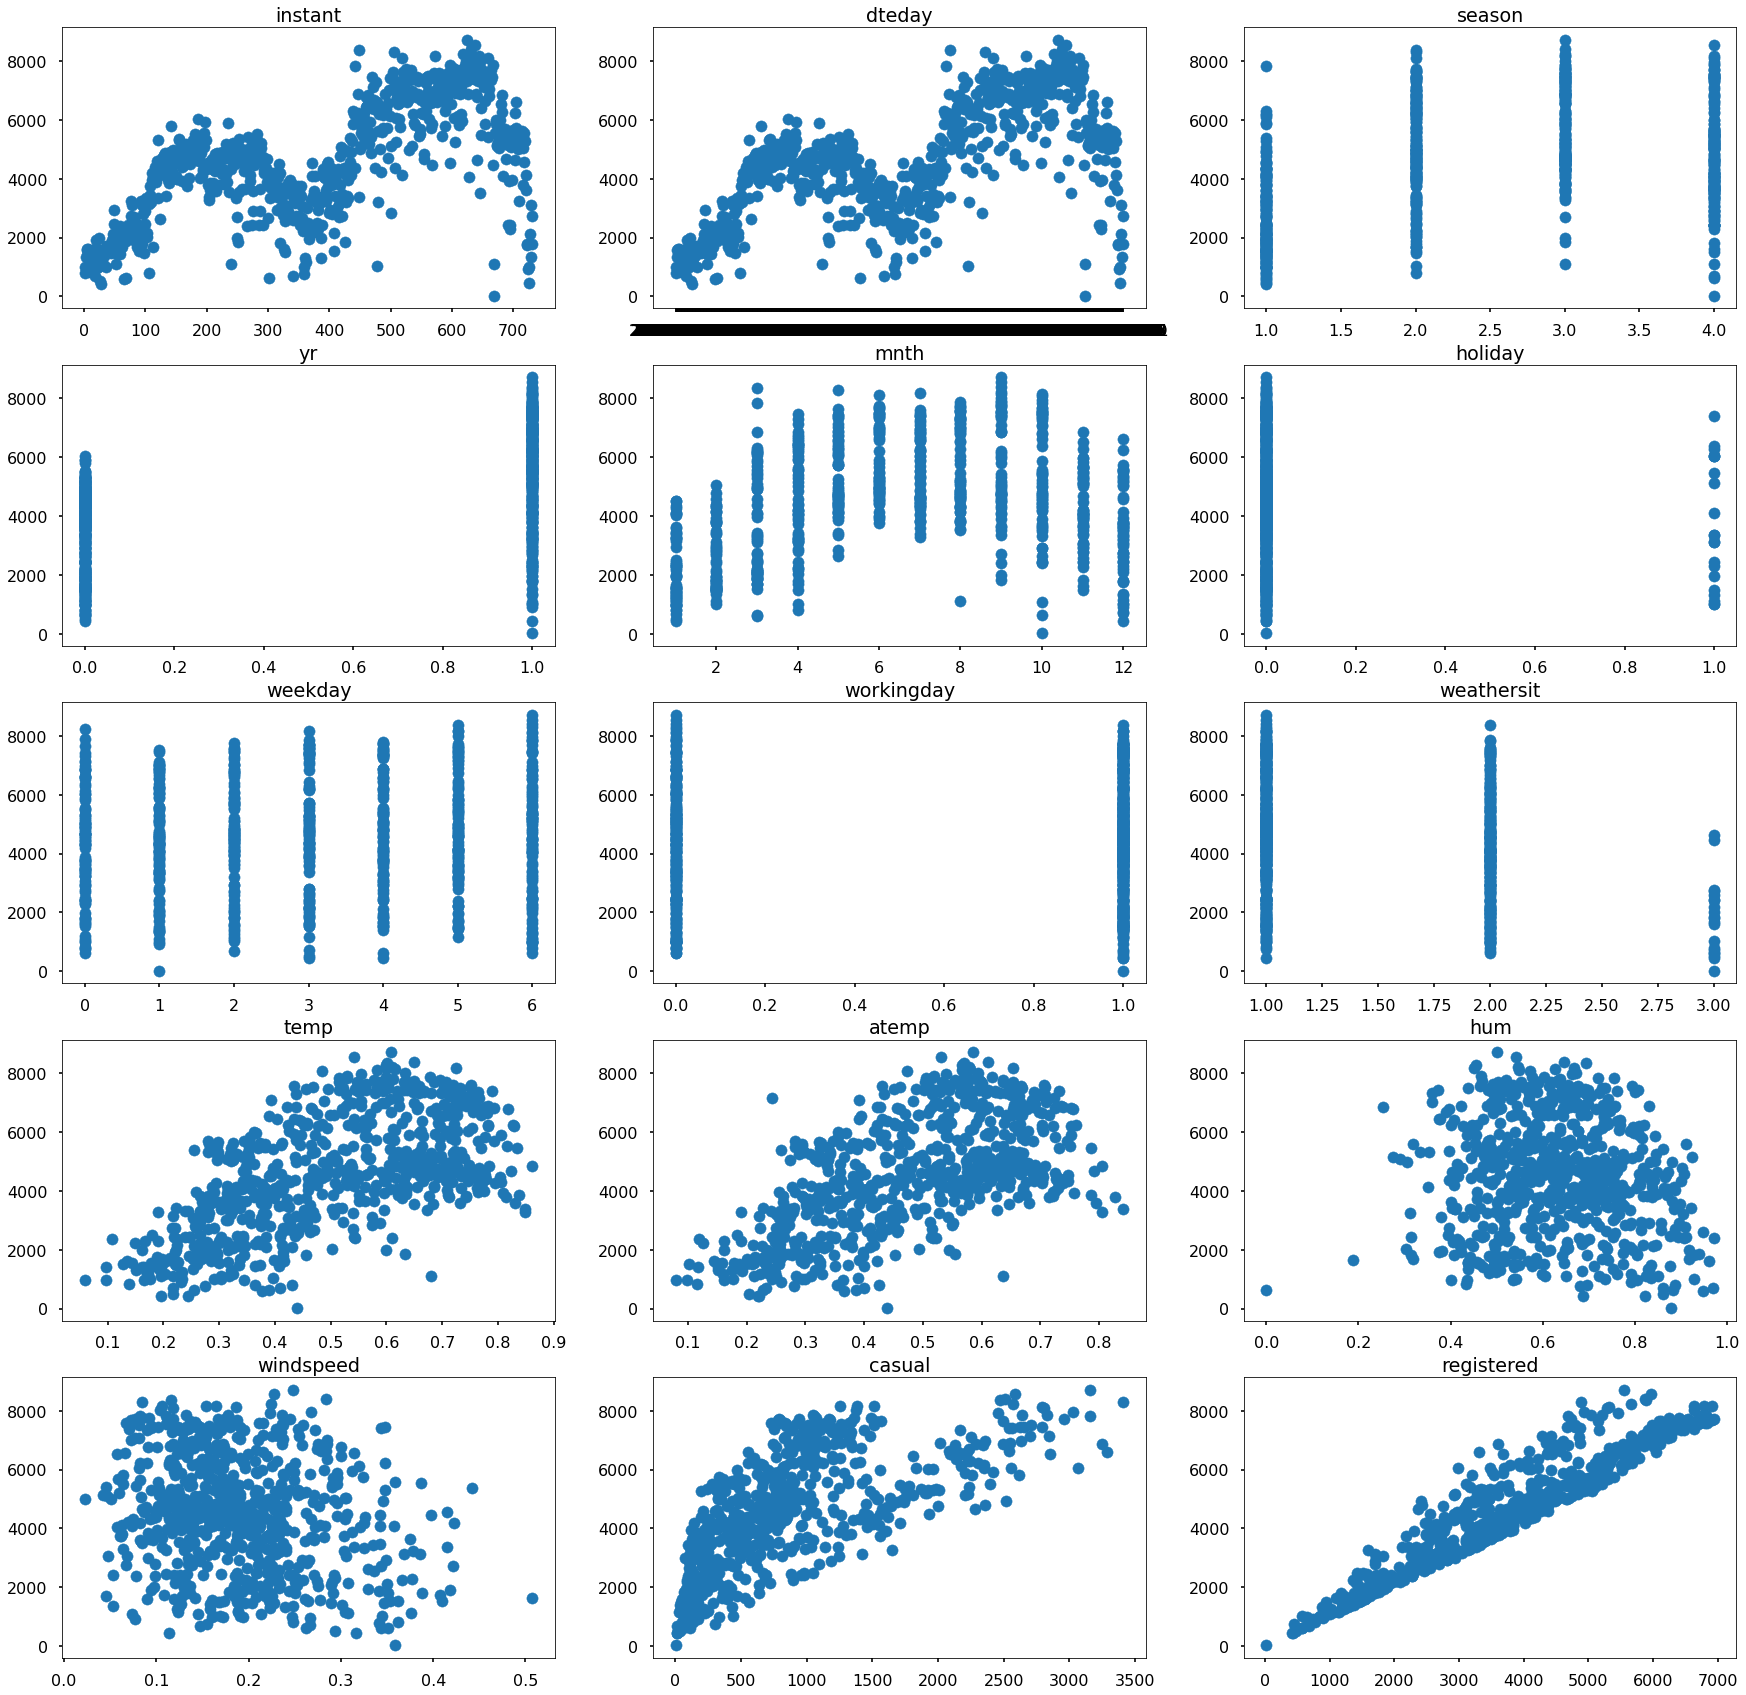

In [9]:
plt.rcParams['figure.figsize'] = (30, 30)
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(5, 3, i+1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

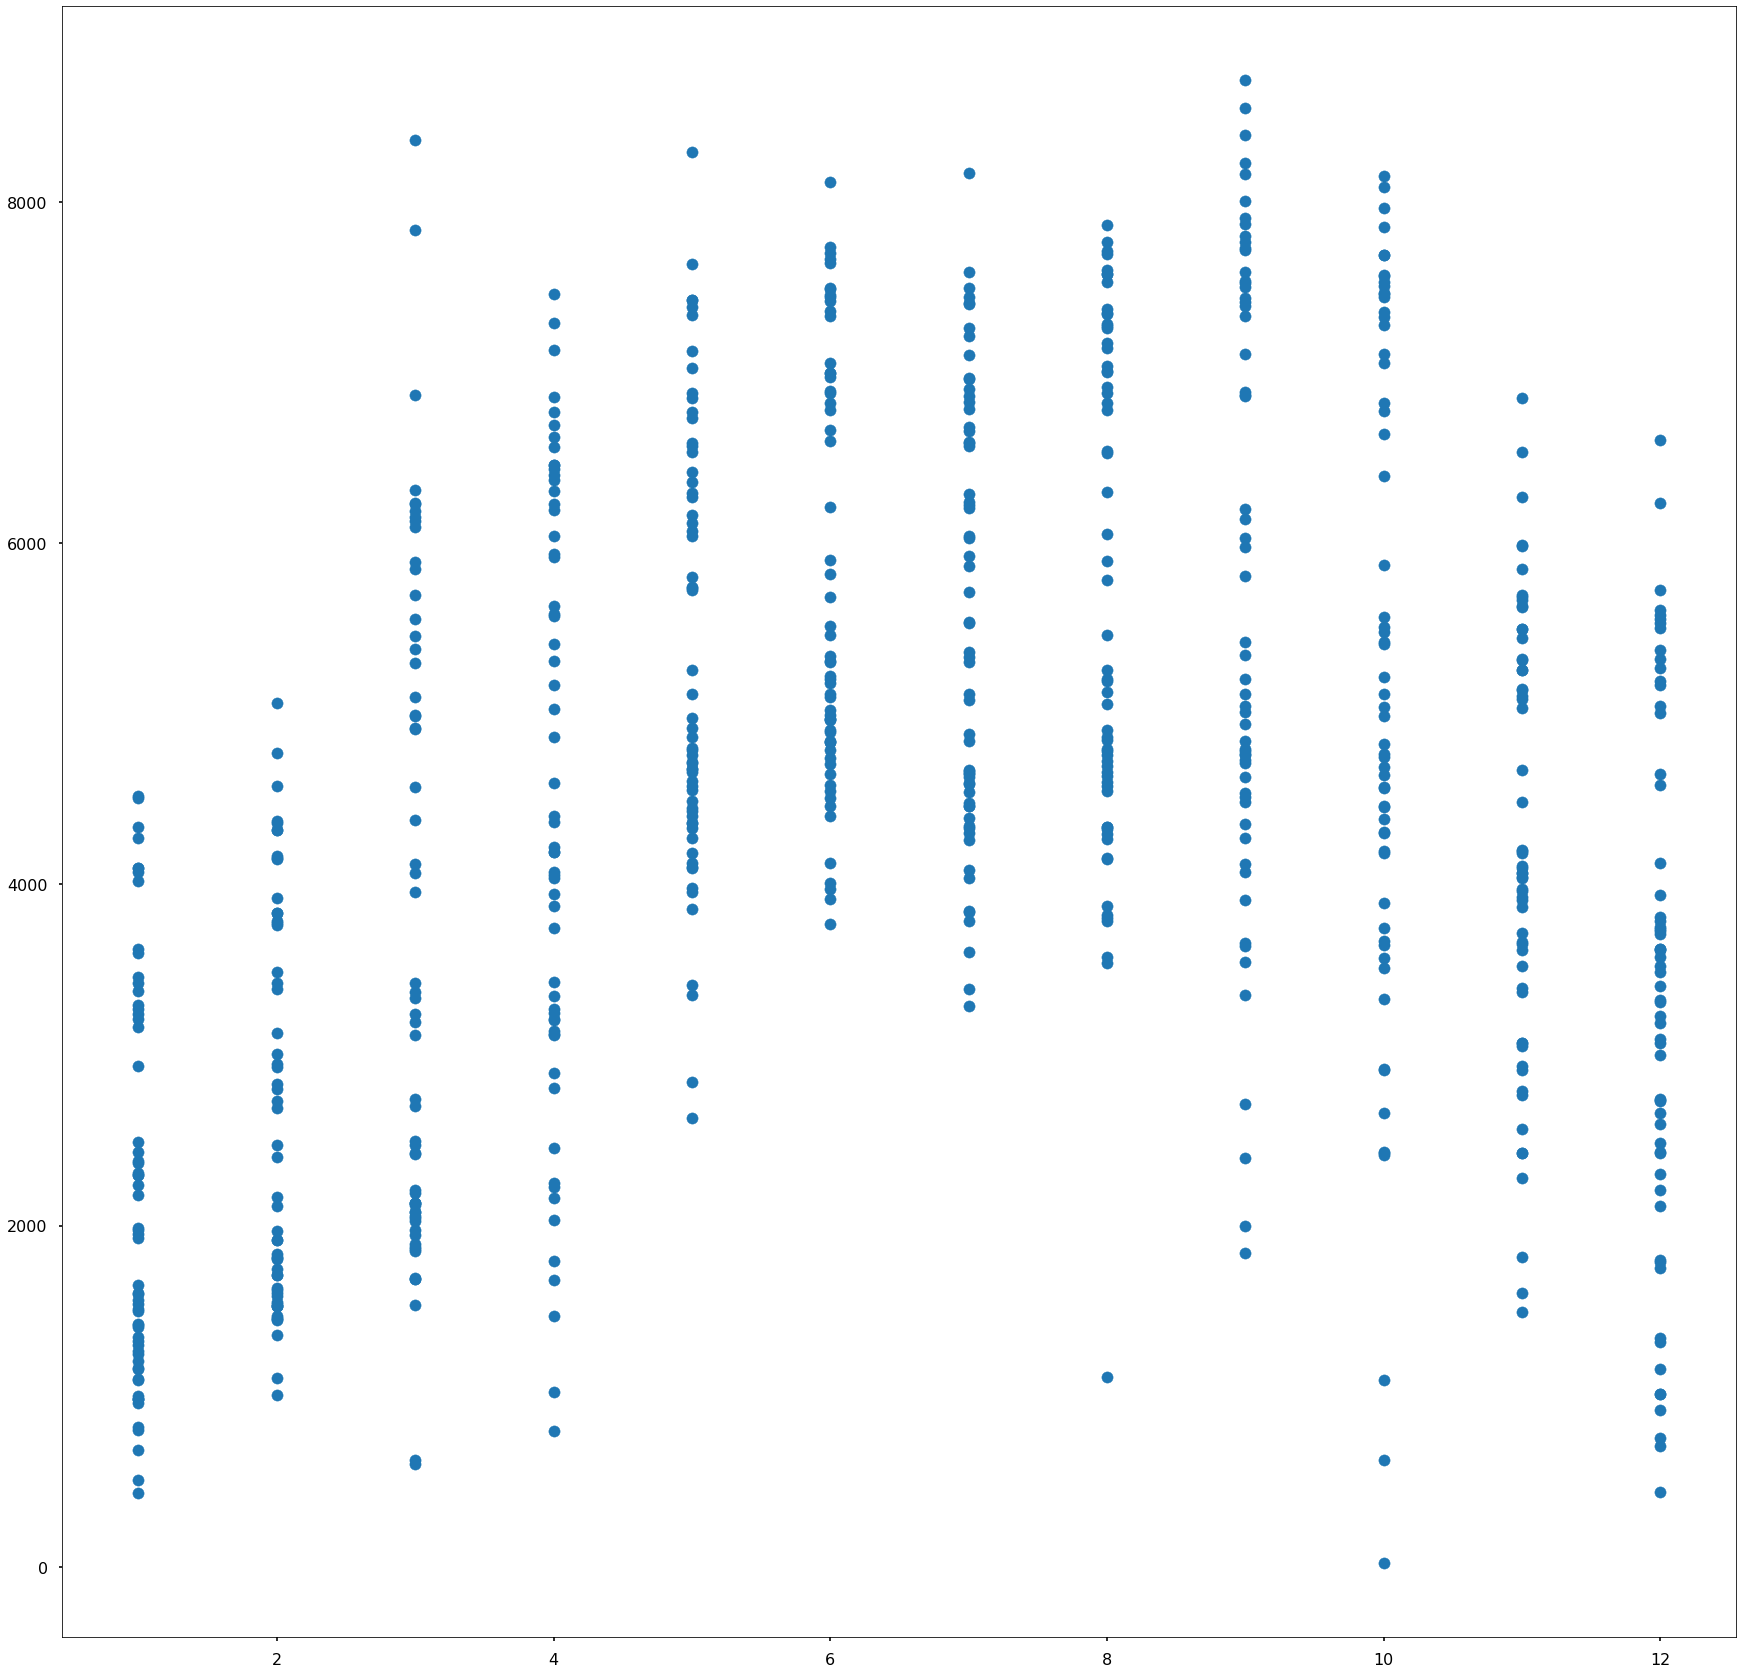

In [11]:

plt.scatter(data['mnth'], data['cnt'])
plt.show()

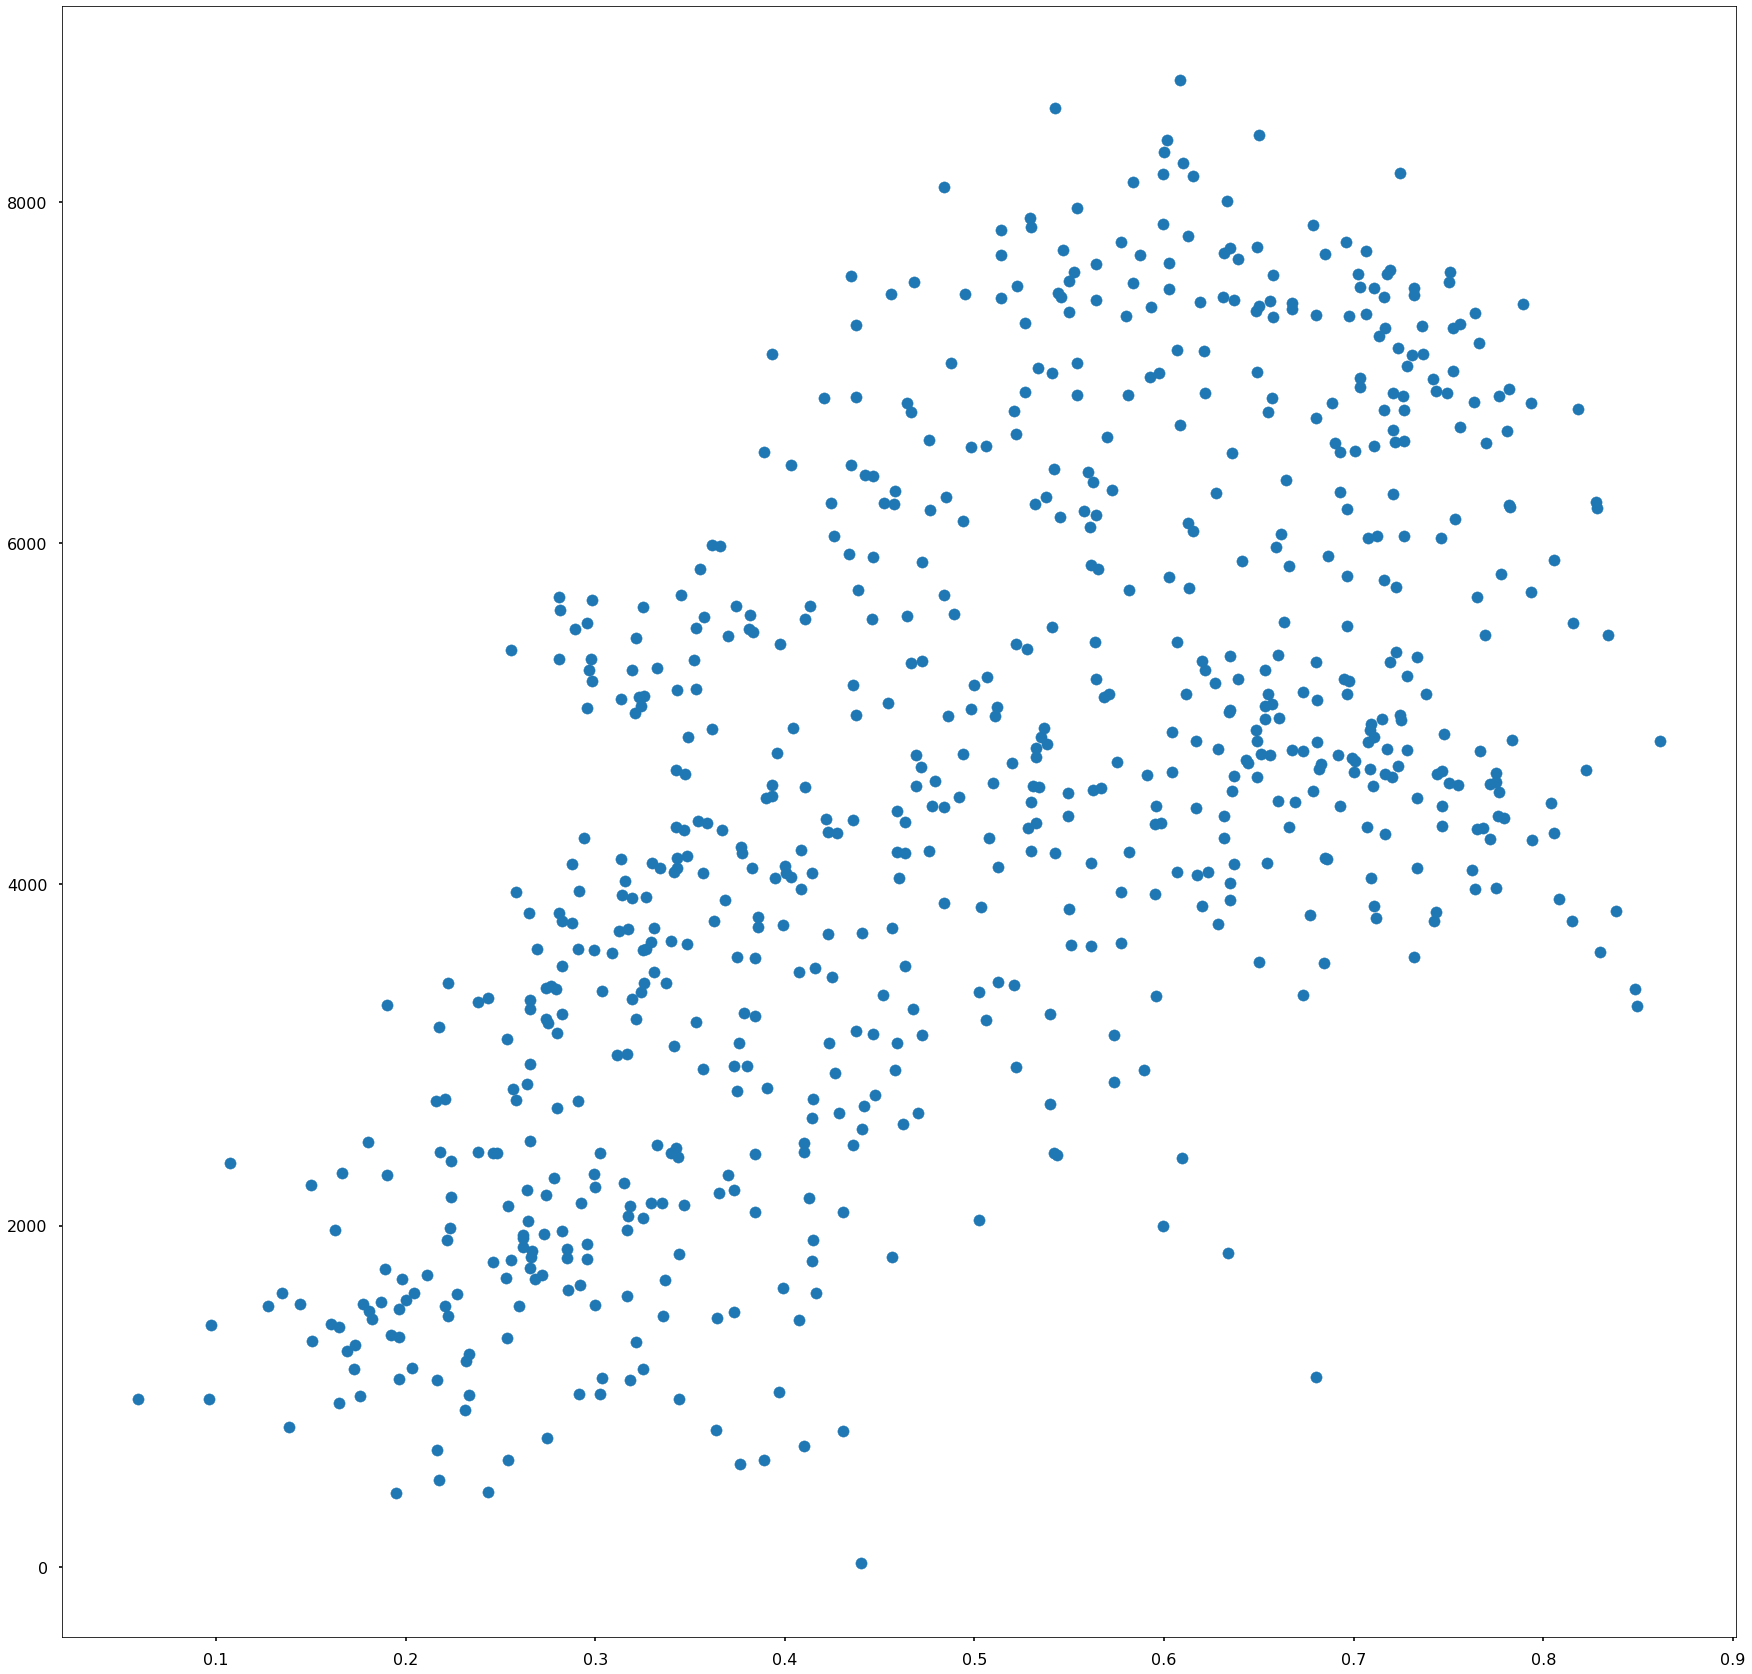

In [12]:
plt.scatter(data['temp'], data['cnt'])
plt.show()

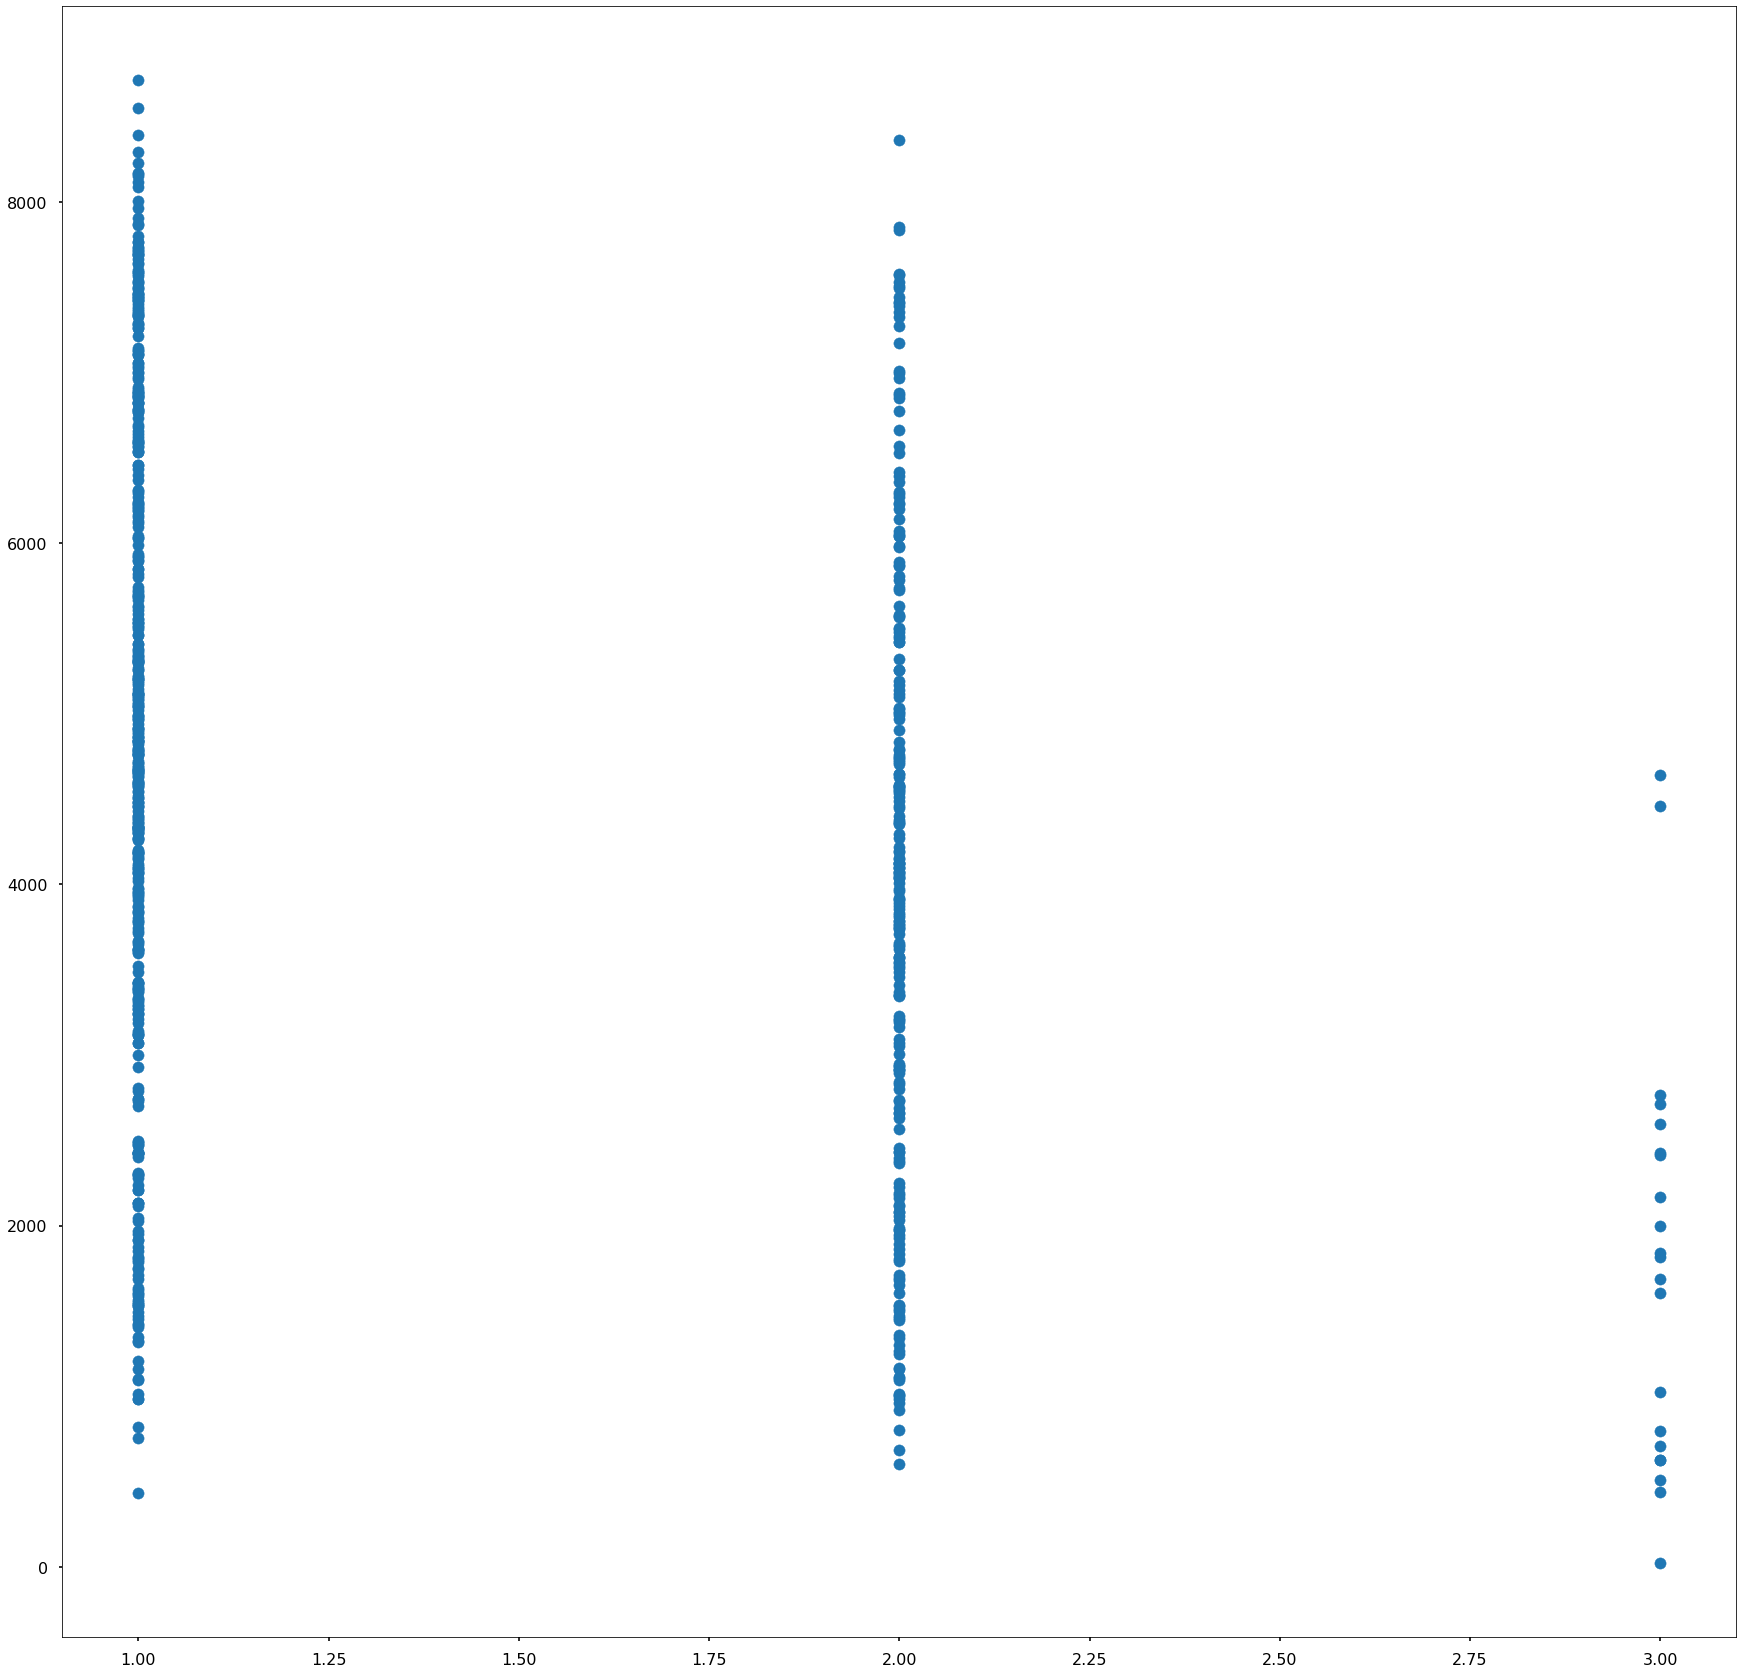

In [13]:
plt.scatter(data['weathersit'], data['cnt'])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

In [15]:
linreg = LinearRegression()
lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)
lasso_cv = LassoCV(random_state=42)
ridge_cv = RidgeCV()

In [16]:
X = data.drop(['cnt', 'instant', 'dteday'], axis=1).values
y = data['cnt'].values

In [17]:
train_part_size = int(.7 * X.shape[0])
X_train = X[:train_part_size, :]
X_valid = X[train_part_size:, :]
y_train = y[:train_part_size]
y_valid = y[train_part_size:]

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

In [19]:
def train_validate_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    R = model.score(X_train_scaled, y_train)
    print('ошибка - > ', np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    print('R - > ', R)
    print(pd.DataFrame(model.coef_, feature_names, columns=['coef']).sort_values(by='coef', ascending=False))
    pred = pd.DataFrame({
        'pred': model.predict(X_valid_scaled),
        'real': y_valid
    })
    pred.plot()

ошибка - >  278.33189992225846
R - >  1.0
                    coef
registered  6.017000e+03
casual      3.401000e+03
atemp       4.519052e-12
workingday  3.420375e-12
holiday     2.319034e-12
windspeed   1.918465e-12
weekday     3.725908e-13
season      0.000000e+00
mnth       -3.410605e-13
weathersit -3.872458e-13
yr         -6.821210e-13
hum        -1.705303e-12
temp       -7.531753e-12


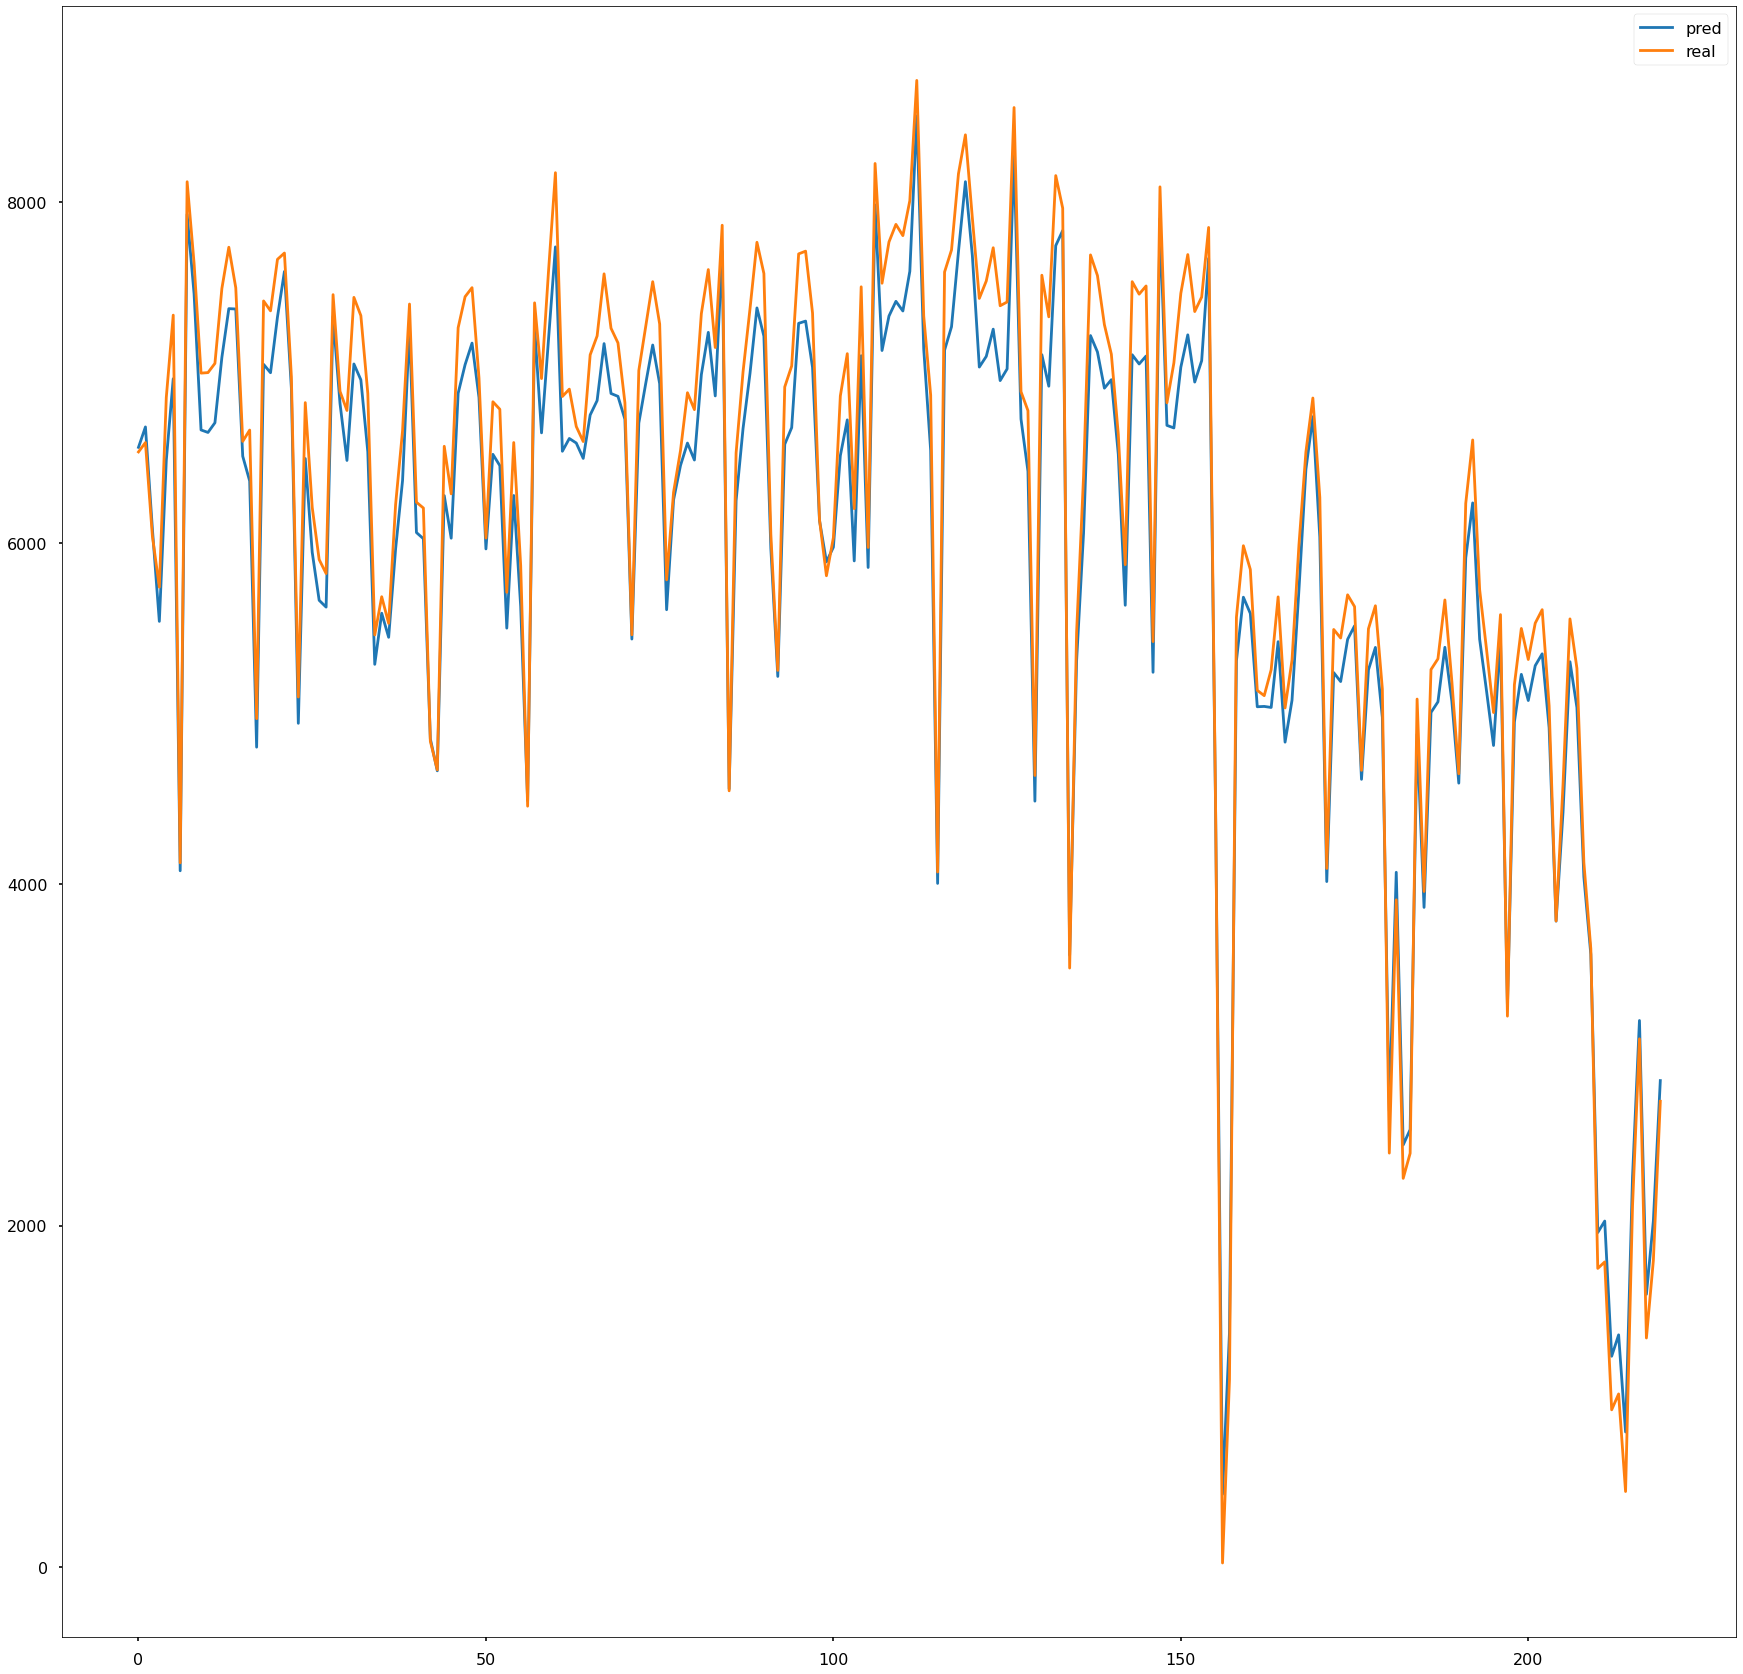

In [20]:
train_validate_report(linreg, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[2:-1])

ошибка - >  286.10068876113166
R - >  0.9999847182512864
                   coef
registered  6001.066421
casual      3378.531092
season         0.000000
yr             0.000000
mnth           0.000000
holiday       -0.000000
weekday        0.000000
workingday    -0.000000
weathersit    -0.000000
temp           0.000000
atemp          0.000000
hum           -0.000000
windspeed     -0.000000


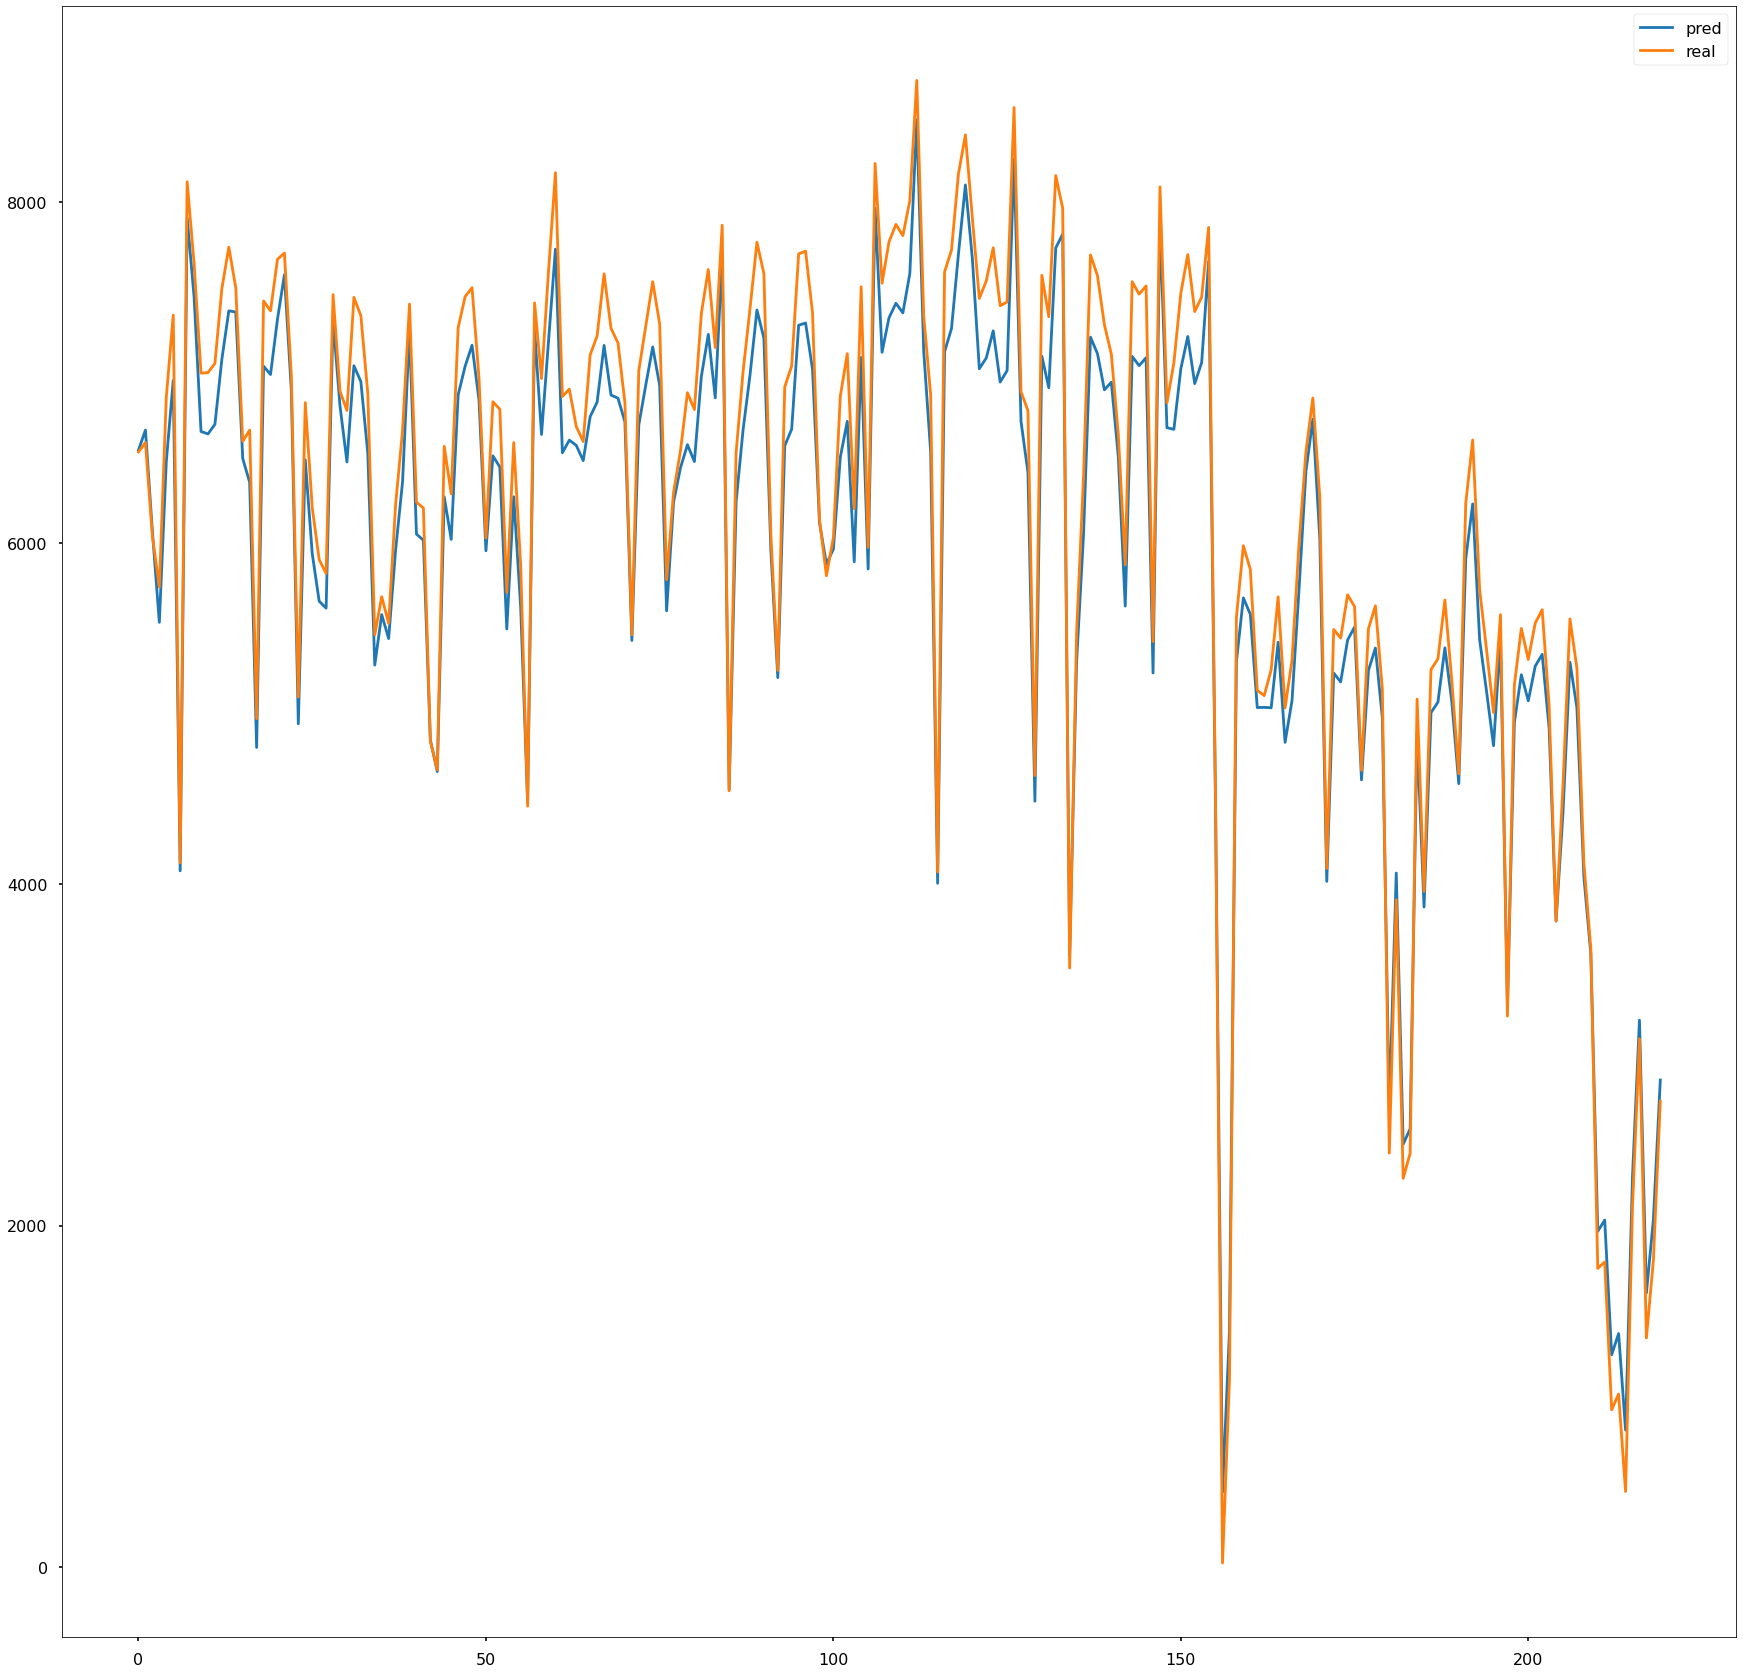

In [21]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[2:-1])

ошибка - >  280.65982648296614
R - >  0.9999986143789958
                   coef
registered  6012.193528
casual      3394.242834
season         0.000000
yr             0.000000
mnth           0.000000
holiday       -0.000000
weekday        0.000000
workingday    -0.000000
weathersit    -0.000000
temp           0.000000
atemp          0.000000
hum           -0.000000
windspeed     -0.000000


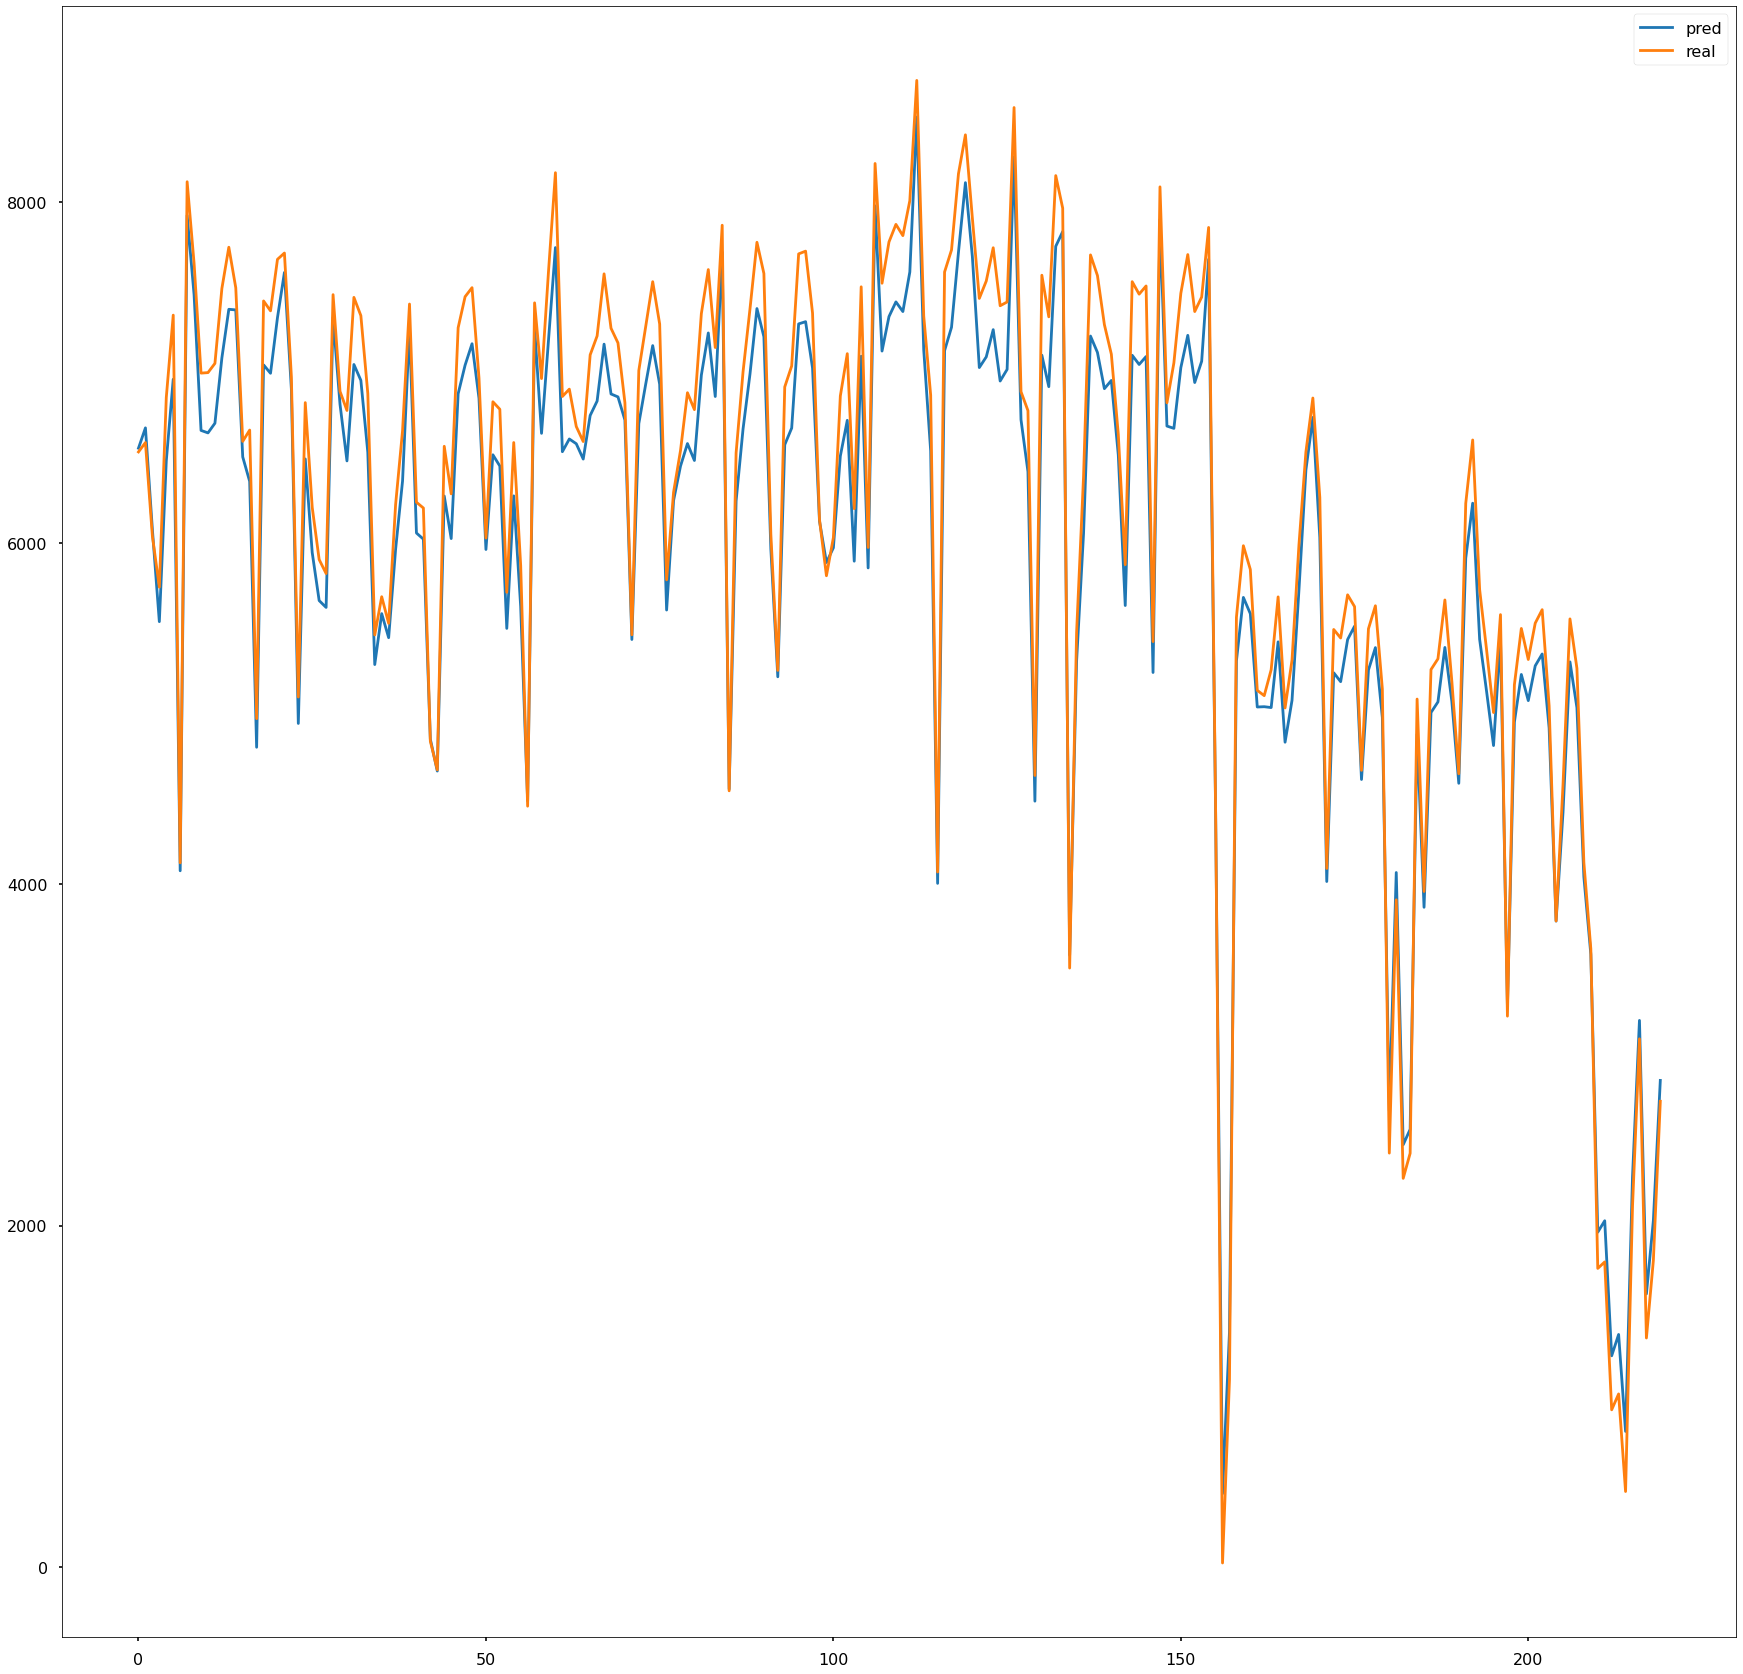

In [22]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[2:-1])

ошибка - >  609.1428133768028
R - >  0.9956915919616104
                   coef
registered  4952.718942
casual      3203.351495
yr           335.445873
atemp        293.574257
temp         270.930215
season       164.883022
workingday    94.032377
mnth          45.941067
weekday       41.522244
holiday      -40.265818
hum         -108.795133
windspeed   -146.123716
weathersit  -168.141074


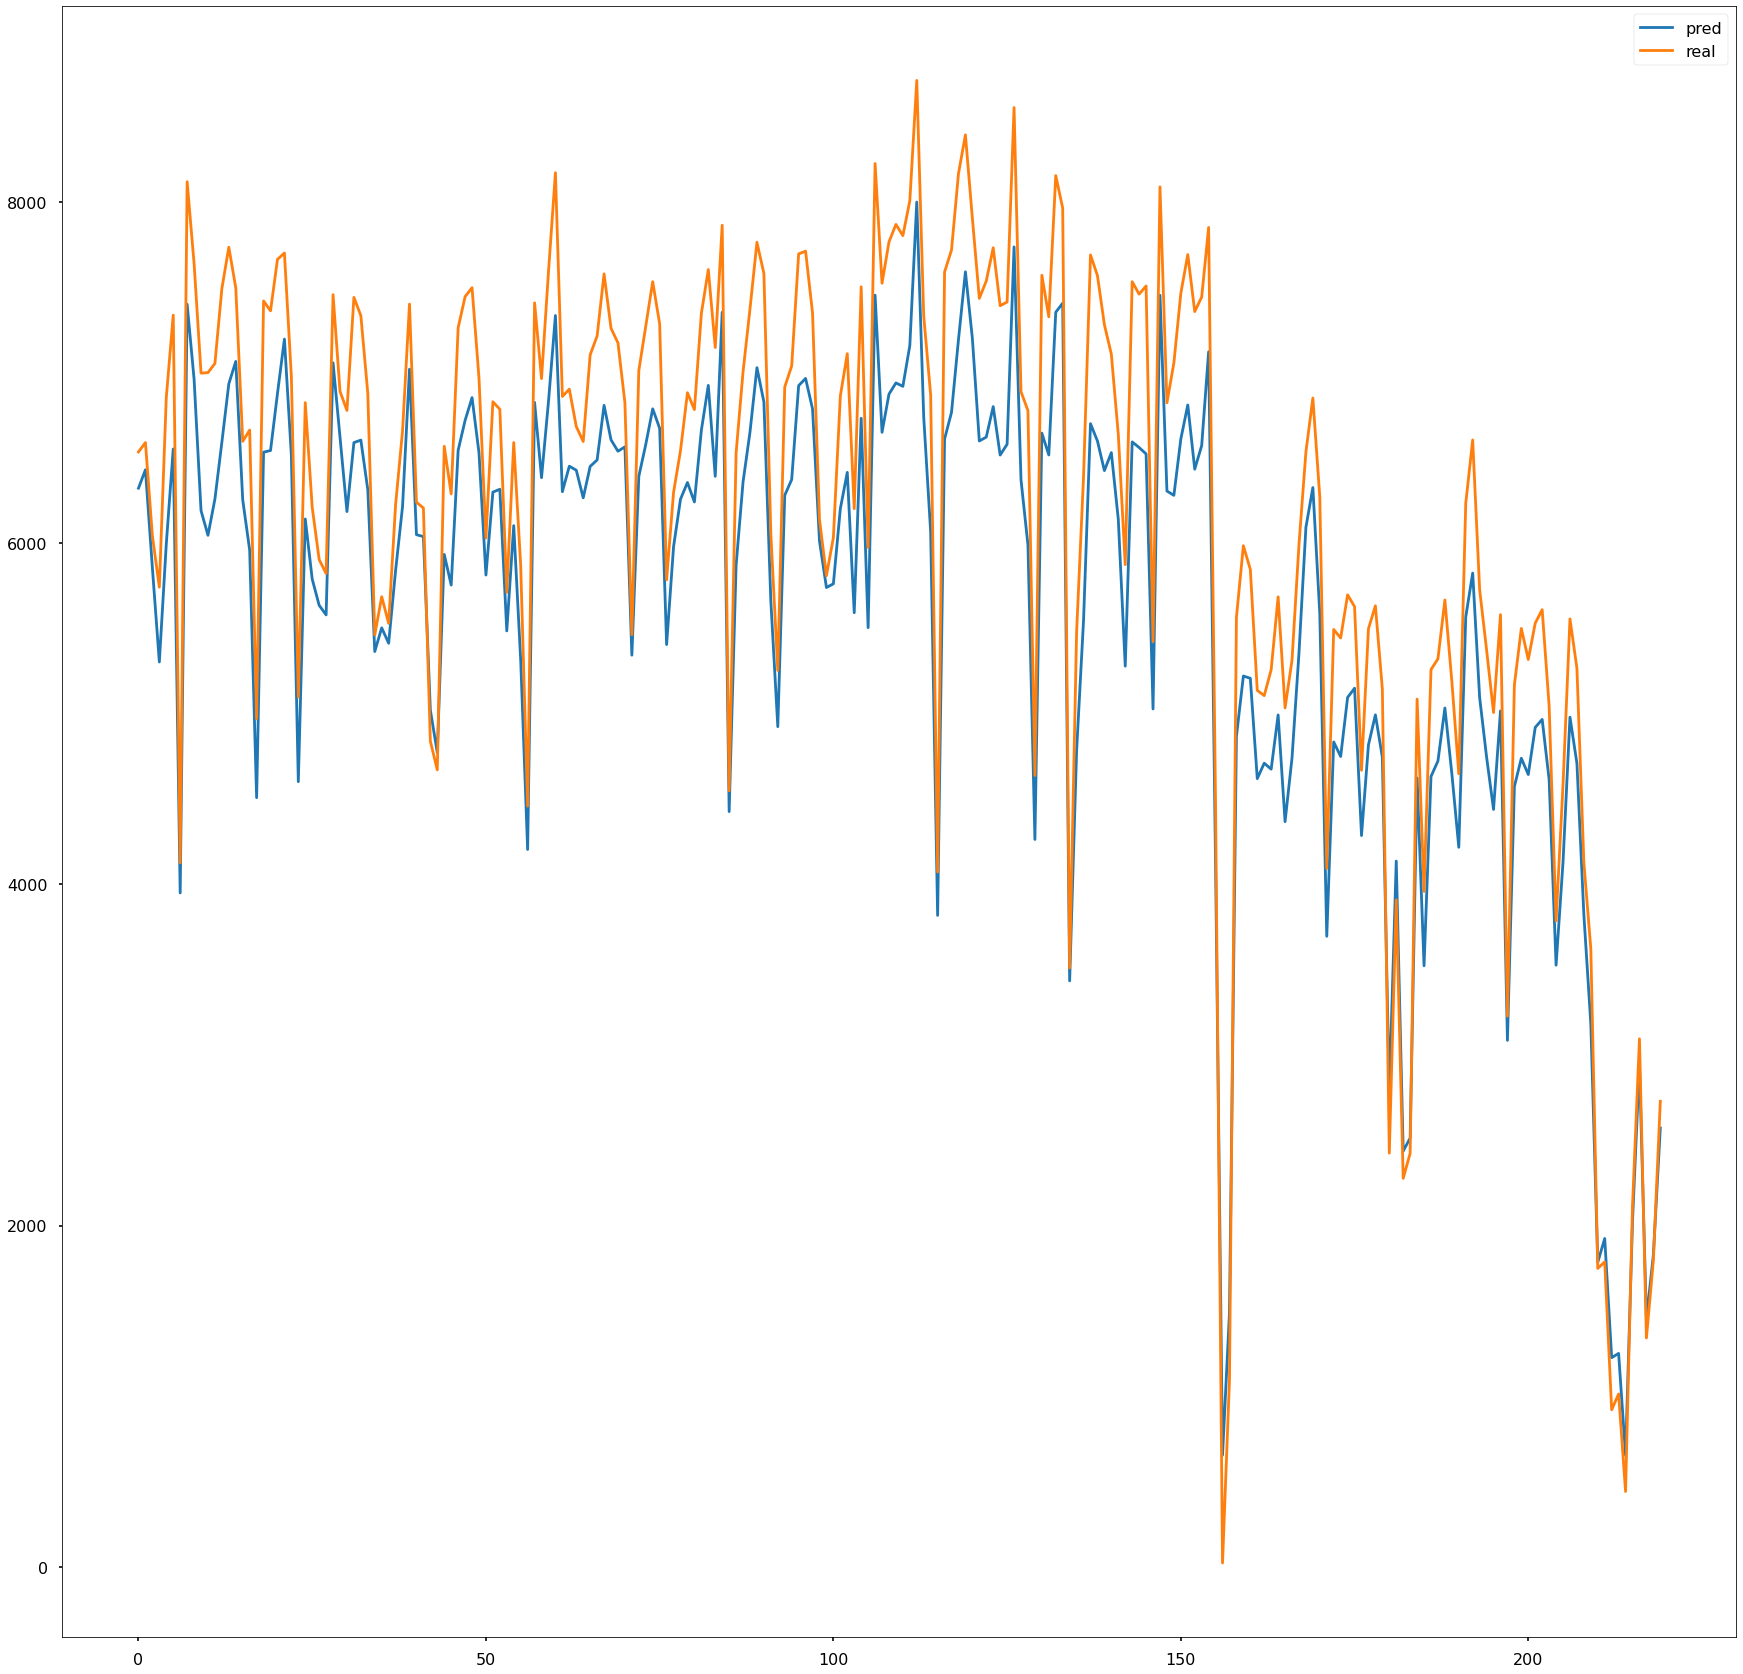

In [23]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[2:-1])

ошибка - >  316.9928240865025
R - >  0.9999329670613308
                   coef
registered  5879.182497
casual      3384.300377
atemp         48.957007
yr            43.060682
temp          22.293657
season        21.304173
workingday    14.138091
mnth           5.915715
weekday        5.152706
holiday       -4.548954
hum          -15.152517
windspeed    -18.890160
weathersit   -20.924512


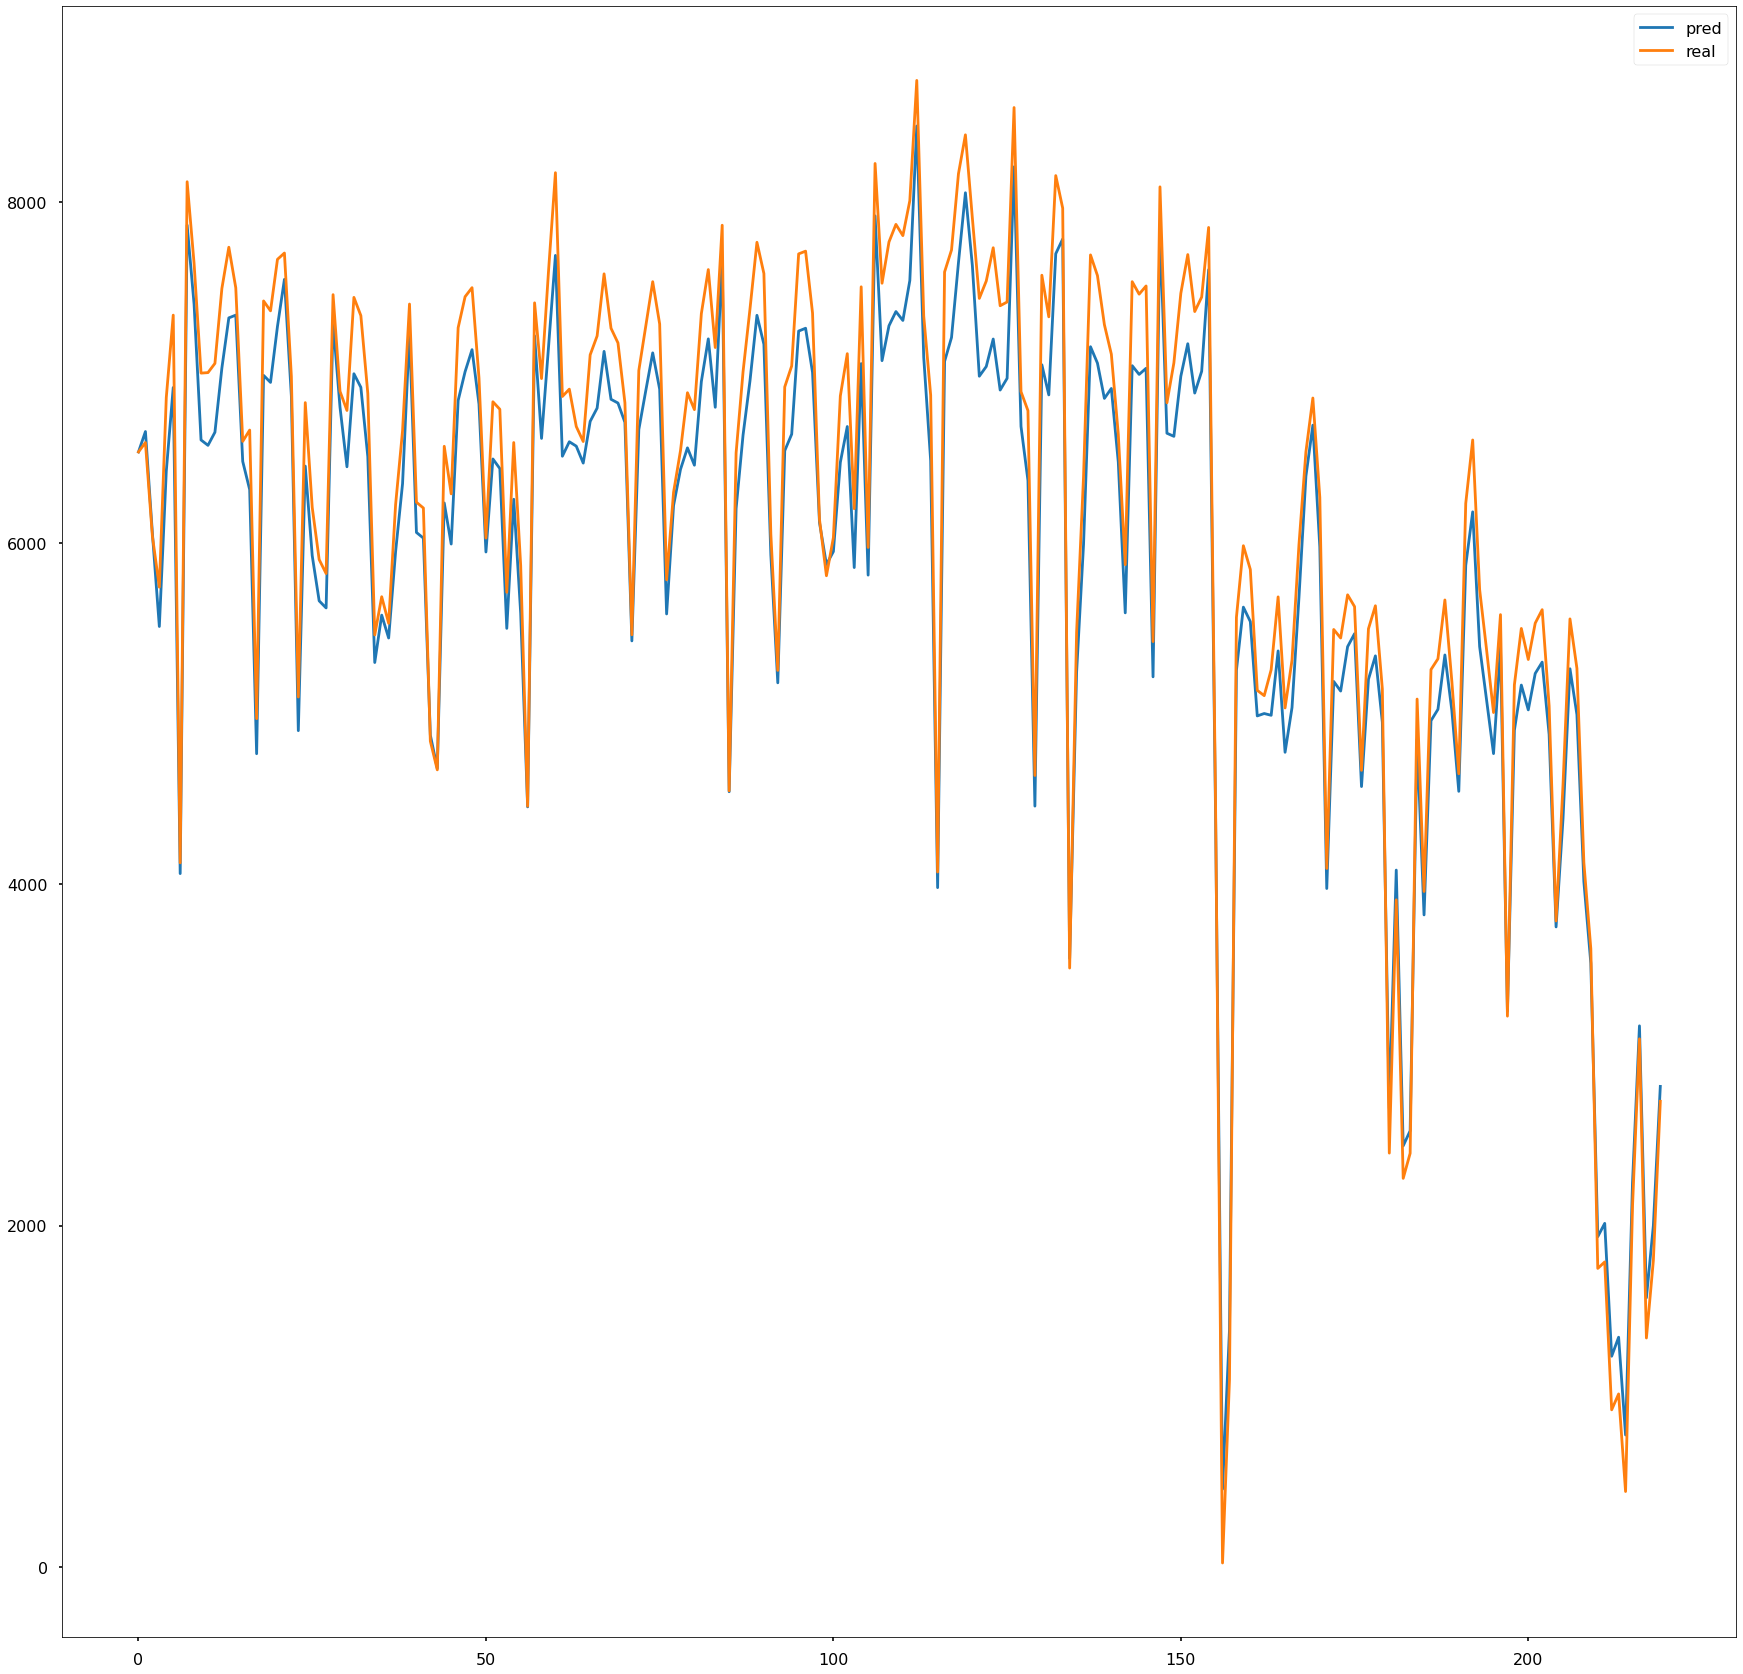

In [24]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data.columns[2:-1])

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


<AxesSubplot:>

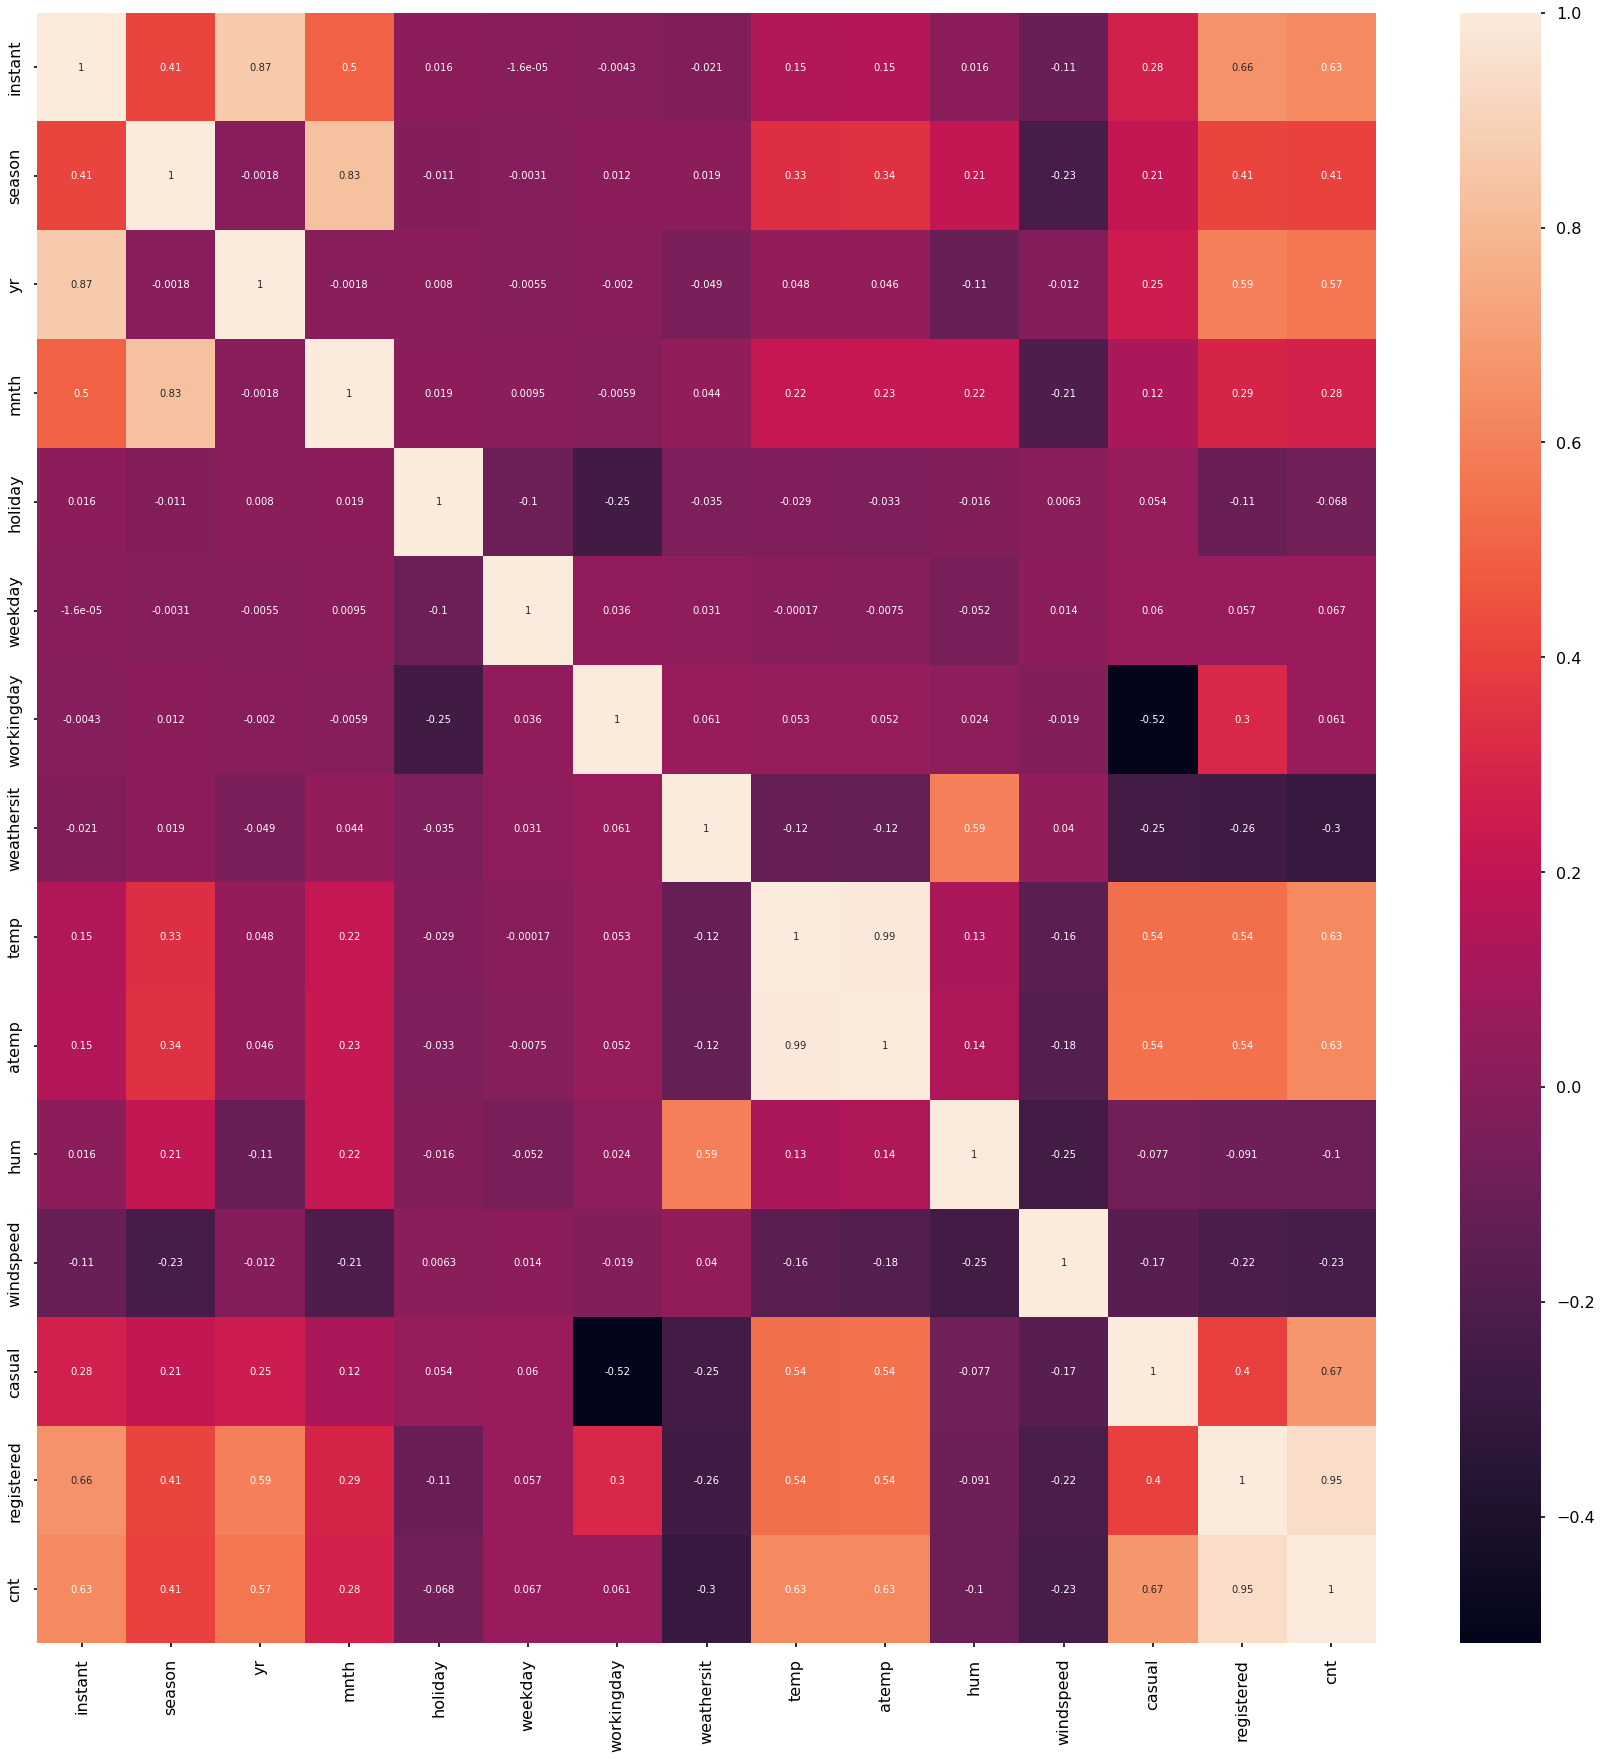

In [25]:
print(data.head())
hm = sns.heatmap(data.corr(),
                 cbar=True,
                 annot=True
                )
hm

In [26]:
data2 = data.drop(['instant', 'dteday', 'season', 'weathersit', 'atemp', 'holiday'], axis=1)
data2.head()

yr  mnth  weekday  workingday      temp       hum  windspeed  casual  \
0   0     1        6           0  0.344167  0.805833   0.160446     331   
1   0     1        0           0  0.363478  0.696087   0.248539     131   
2   0     1        1           1  0.196364  0.437273   0.248309     120   
3   0     1        2           1  0.200000  0.590435   0.160296     108   
4   0     1        3           1  0.226957  0.436957   0.186900      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

<AxesSubplot:>

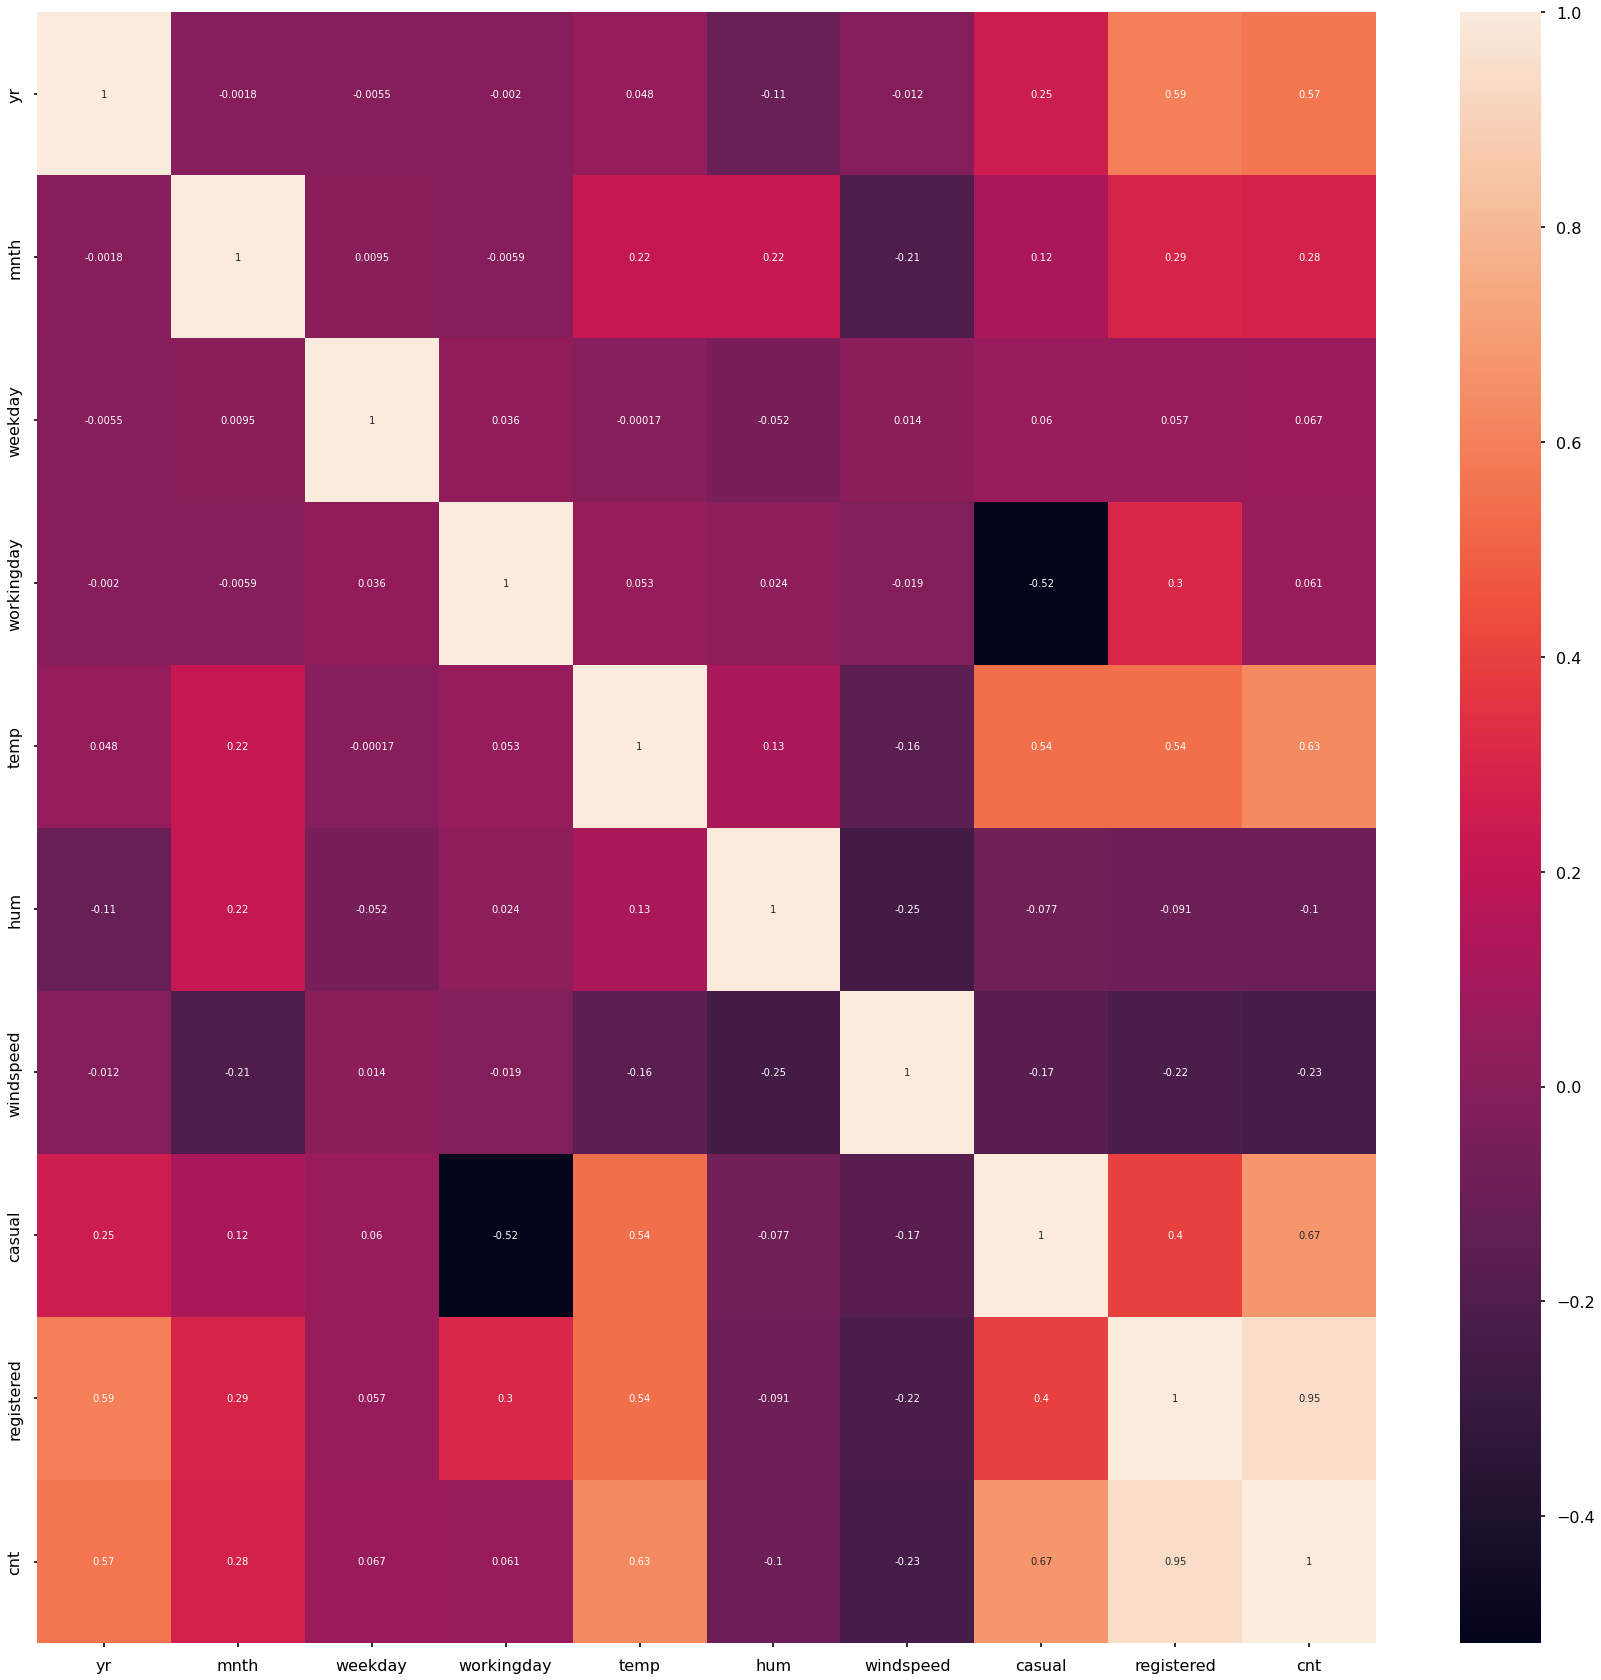

In [27]:
hm = sns.heatmap(data2.corr(),
                 cbar=True,
                 annot=True
                )
hm

In [28]:
X = data2.drop(['cnt'], axis=1).values
y = data2['cnt'].values

train_part_size = int(.7 * X.shape[0])
X_train = X[:train_part_size, :]
X_valid = X[train_part_size:, :]
y_train = y[:train_part_size]
y_valid = y[train_part_size:]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

ошибка - >  278.3318999222552
R - >  1.0
                    coef
registered  6.017000e+03
casual      3.401000e+03
weekday     1.207923e-12
workingday  9.769963e-13
temp        6.821210e-13
mnth        4.547474e-13
yr          4.007747e-13
hum        -1.989520e-12
windspeed  -2.899014e-12


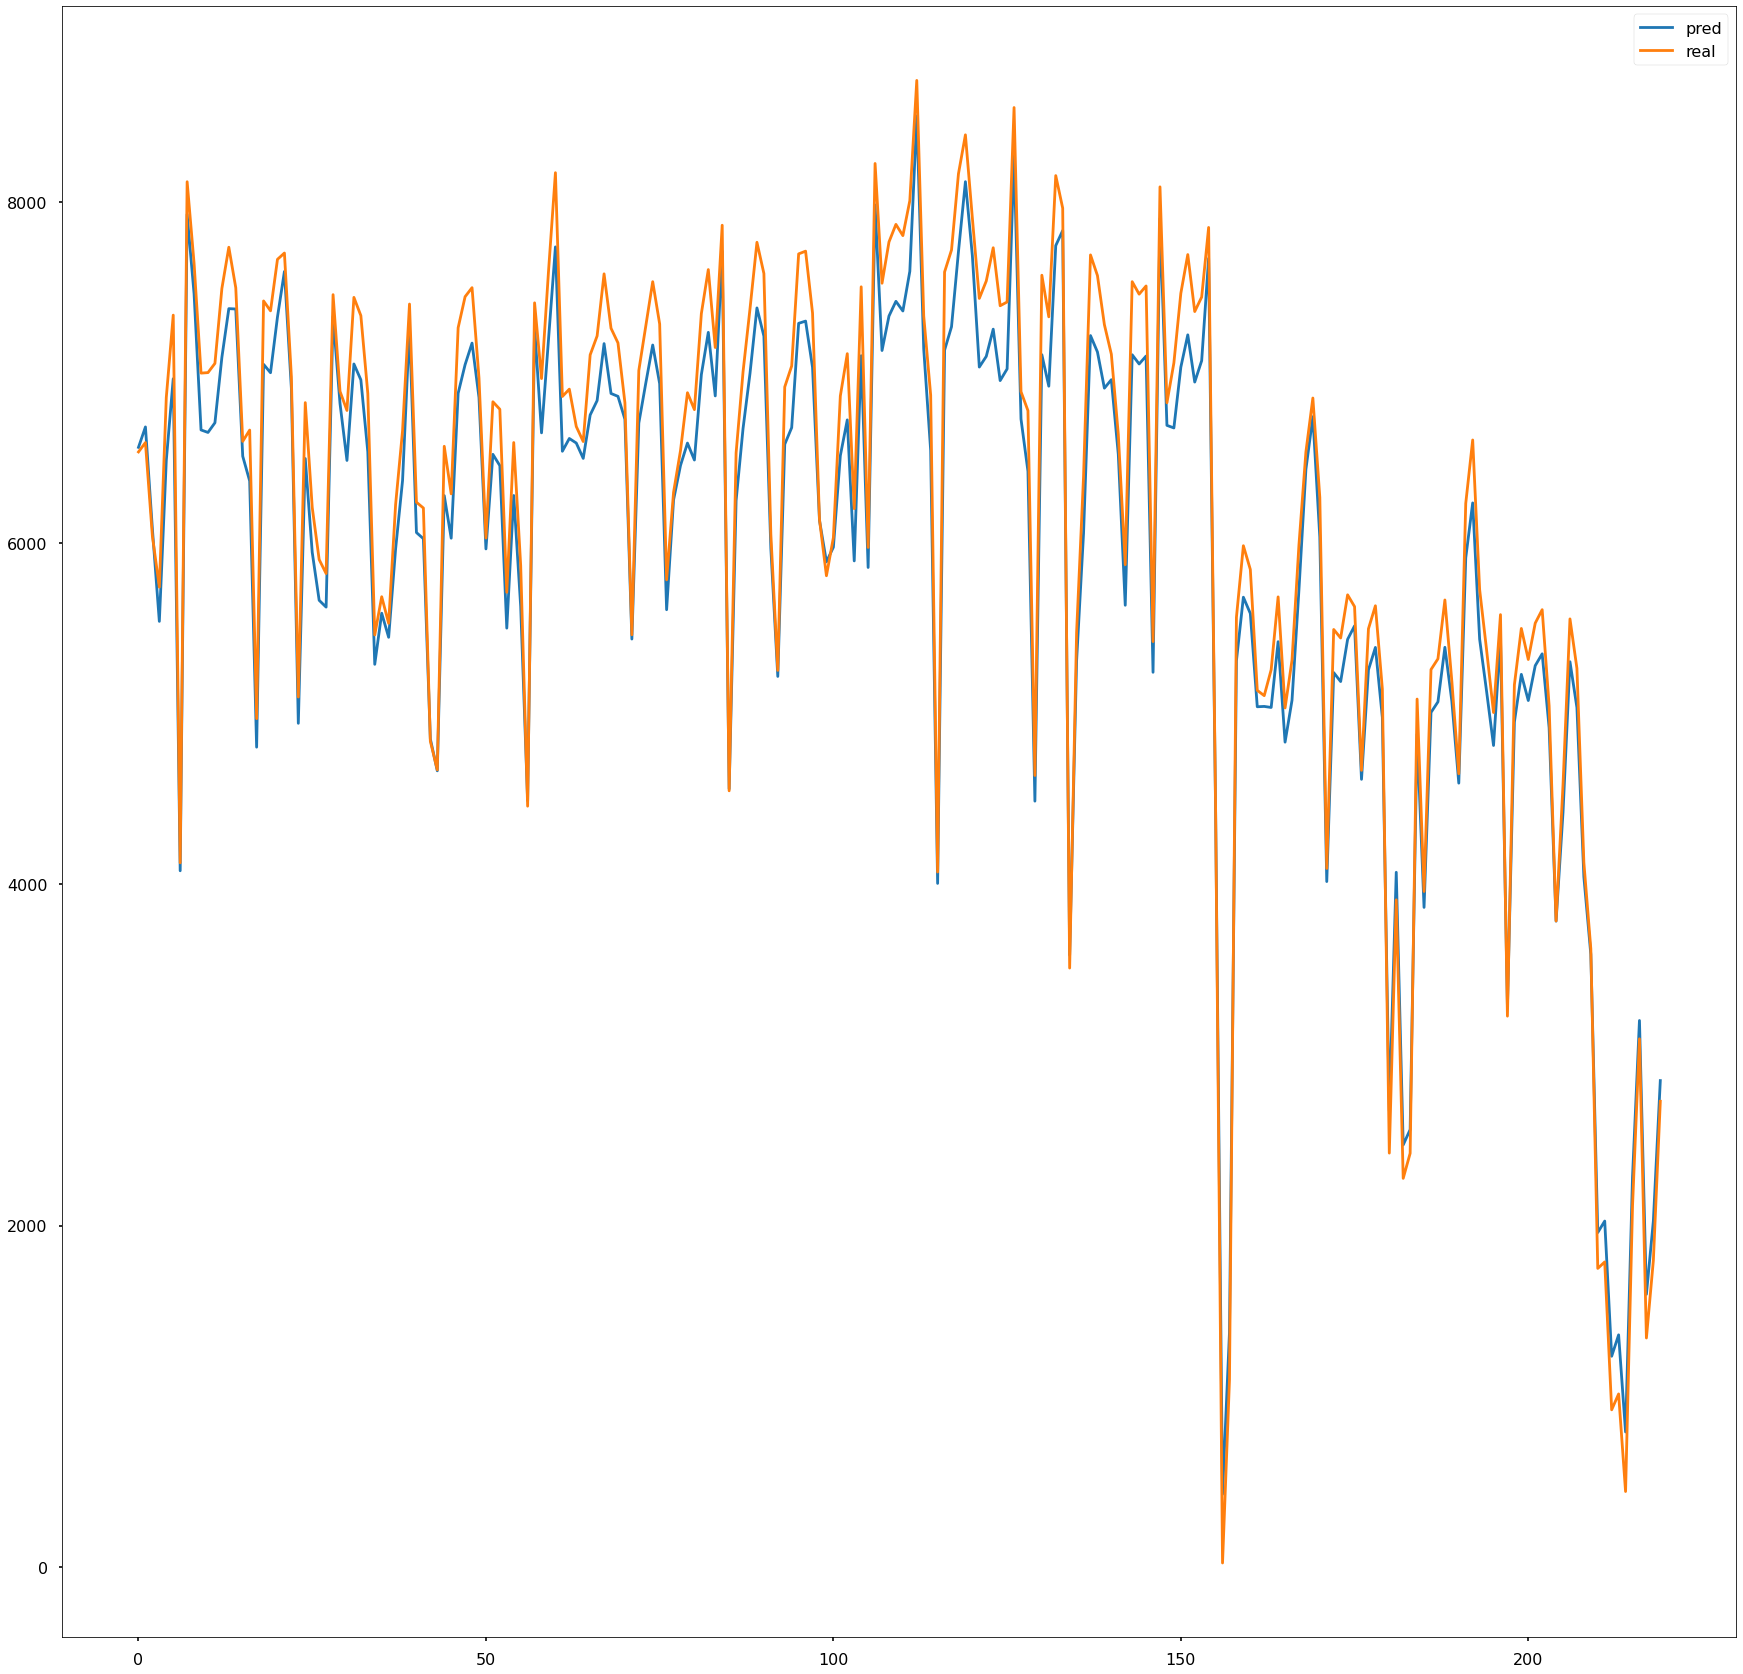

In [38]:
train_validate_report(linreg, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data2.columns[:-1])

ошибка - >  286.1005683633521
R - >  0.999984714767942
                   coef
registered  6001.068893
casual      3378.524241
yr             0.000000
mnth           0.000000
weekday        0.000000
workingday    -0.000000
temp           0.000000
hum           -0.000000
windspeed     -0.000000


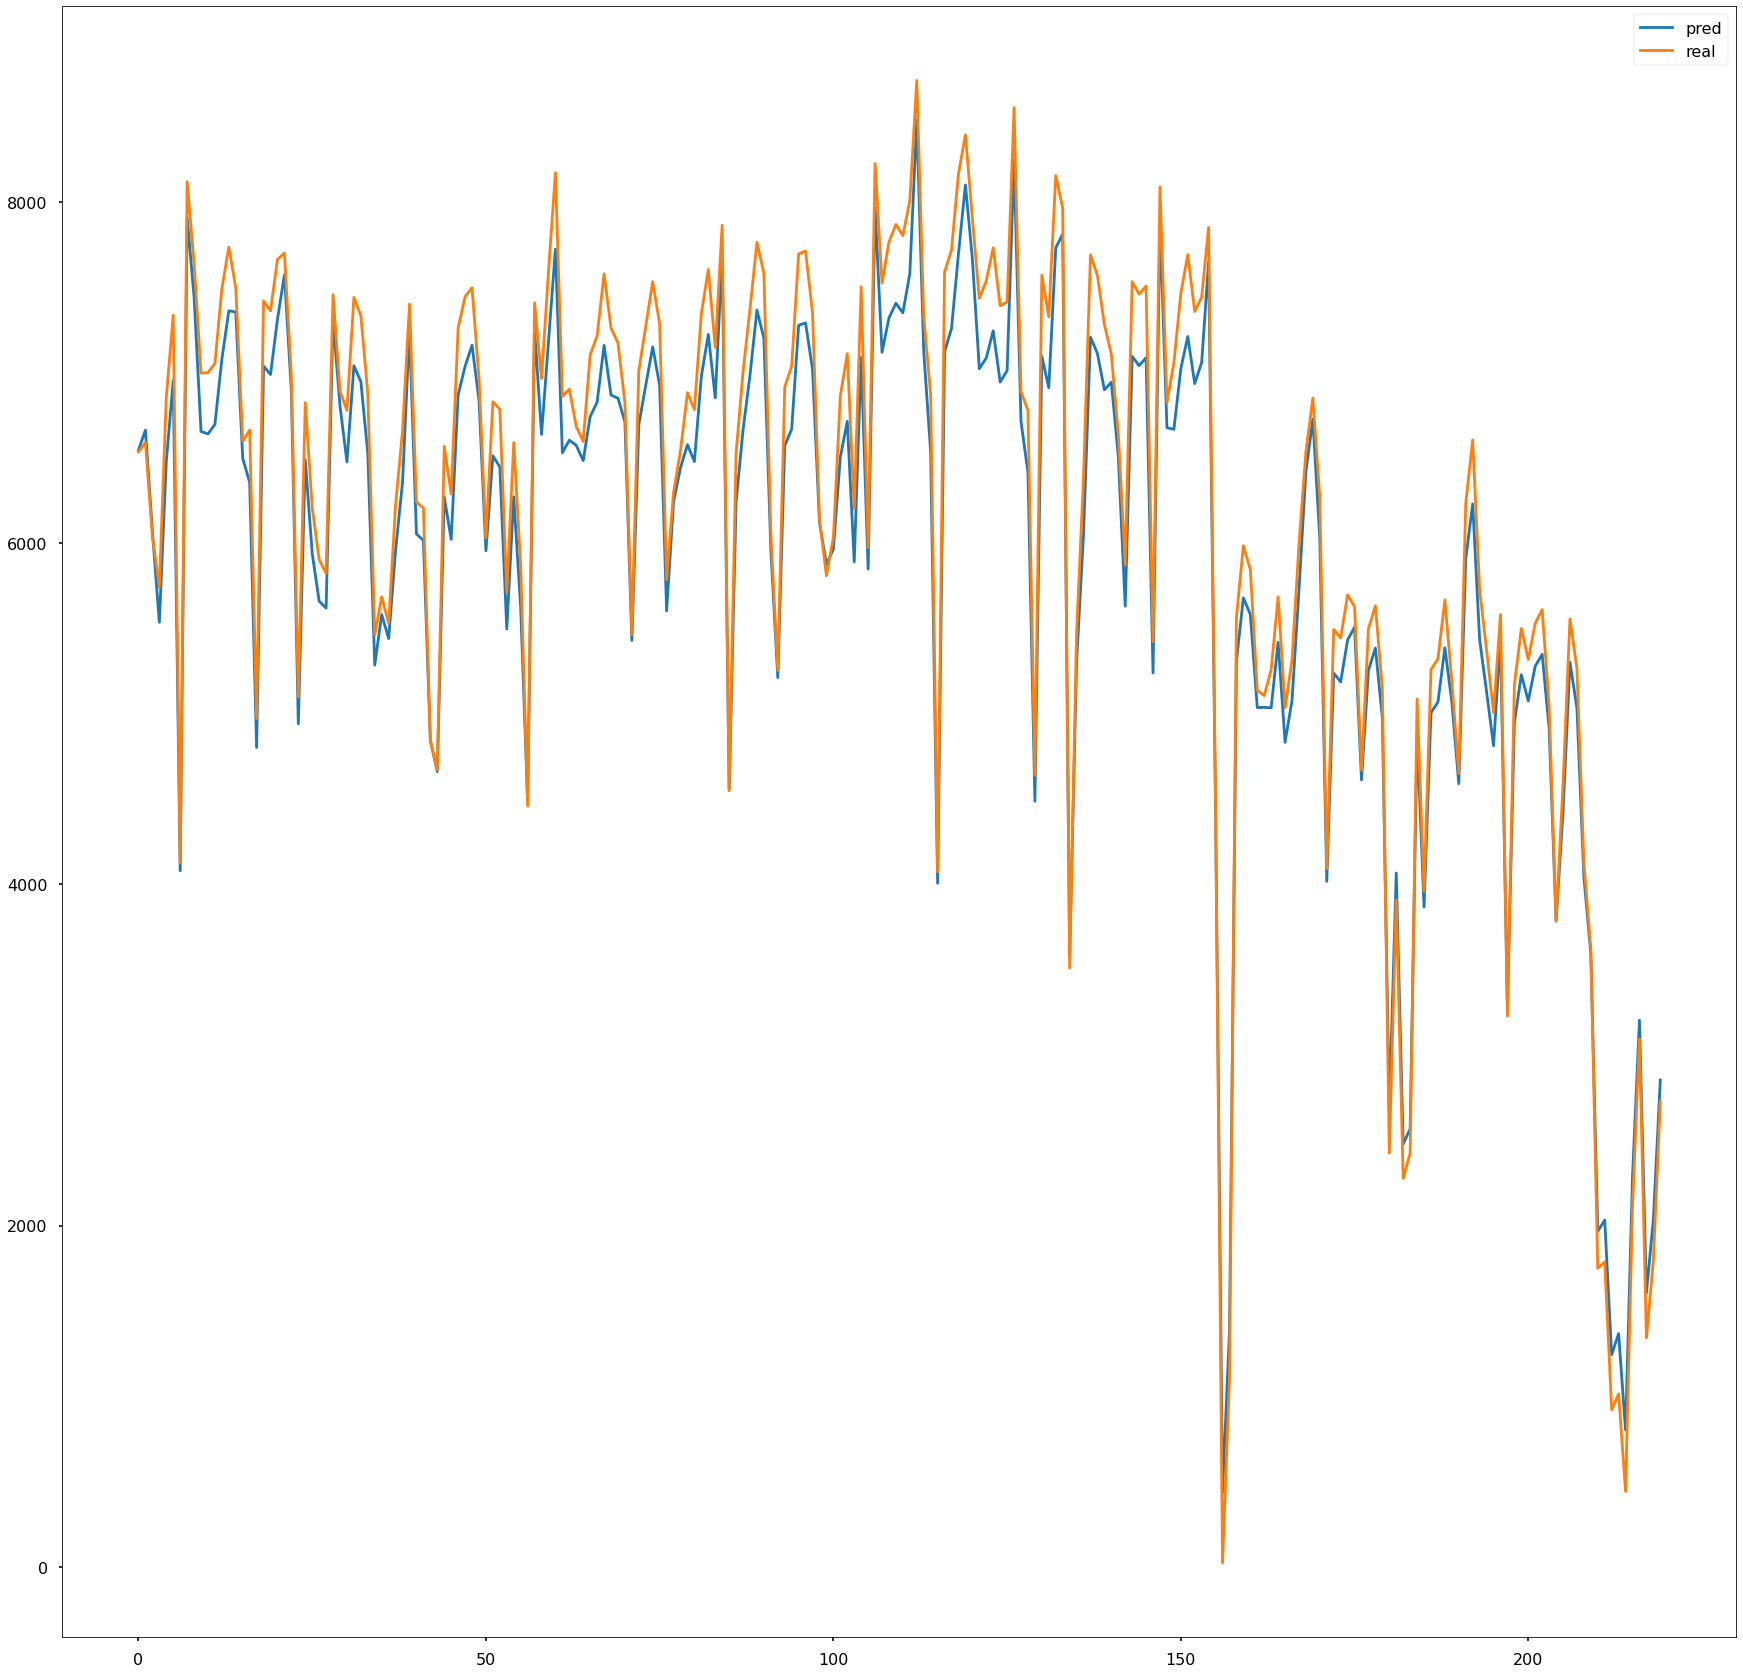

In [37]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data2.columns[:-1])

ошибка - >  280.6601205425268
R - >  0.9999986165256393
                   coef
registered  6012.188457
casual      3394.256892
yr             0.000000
mnth           0.000000
weekday        0.000000
workingday    -0.000000
temp           0.000000
hum           -0.000000
windspeed     -0.000000


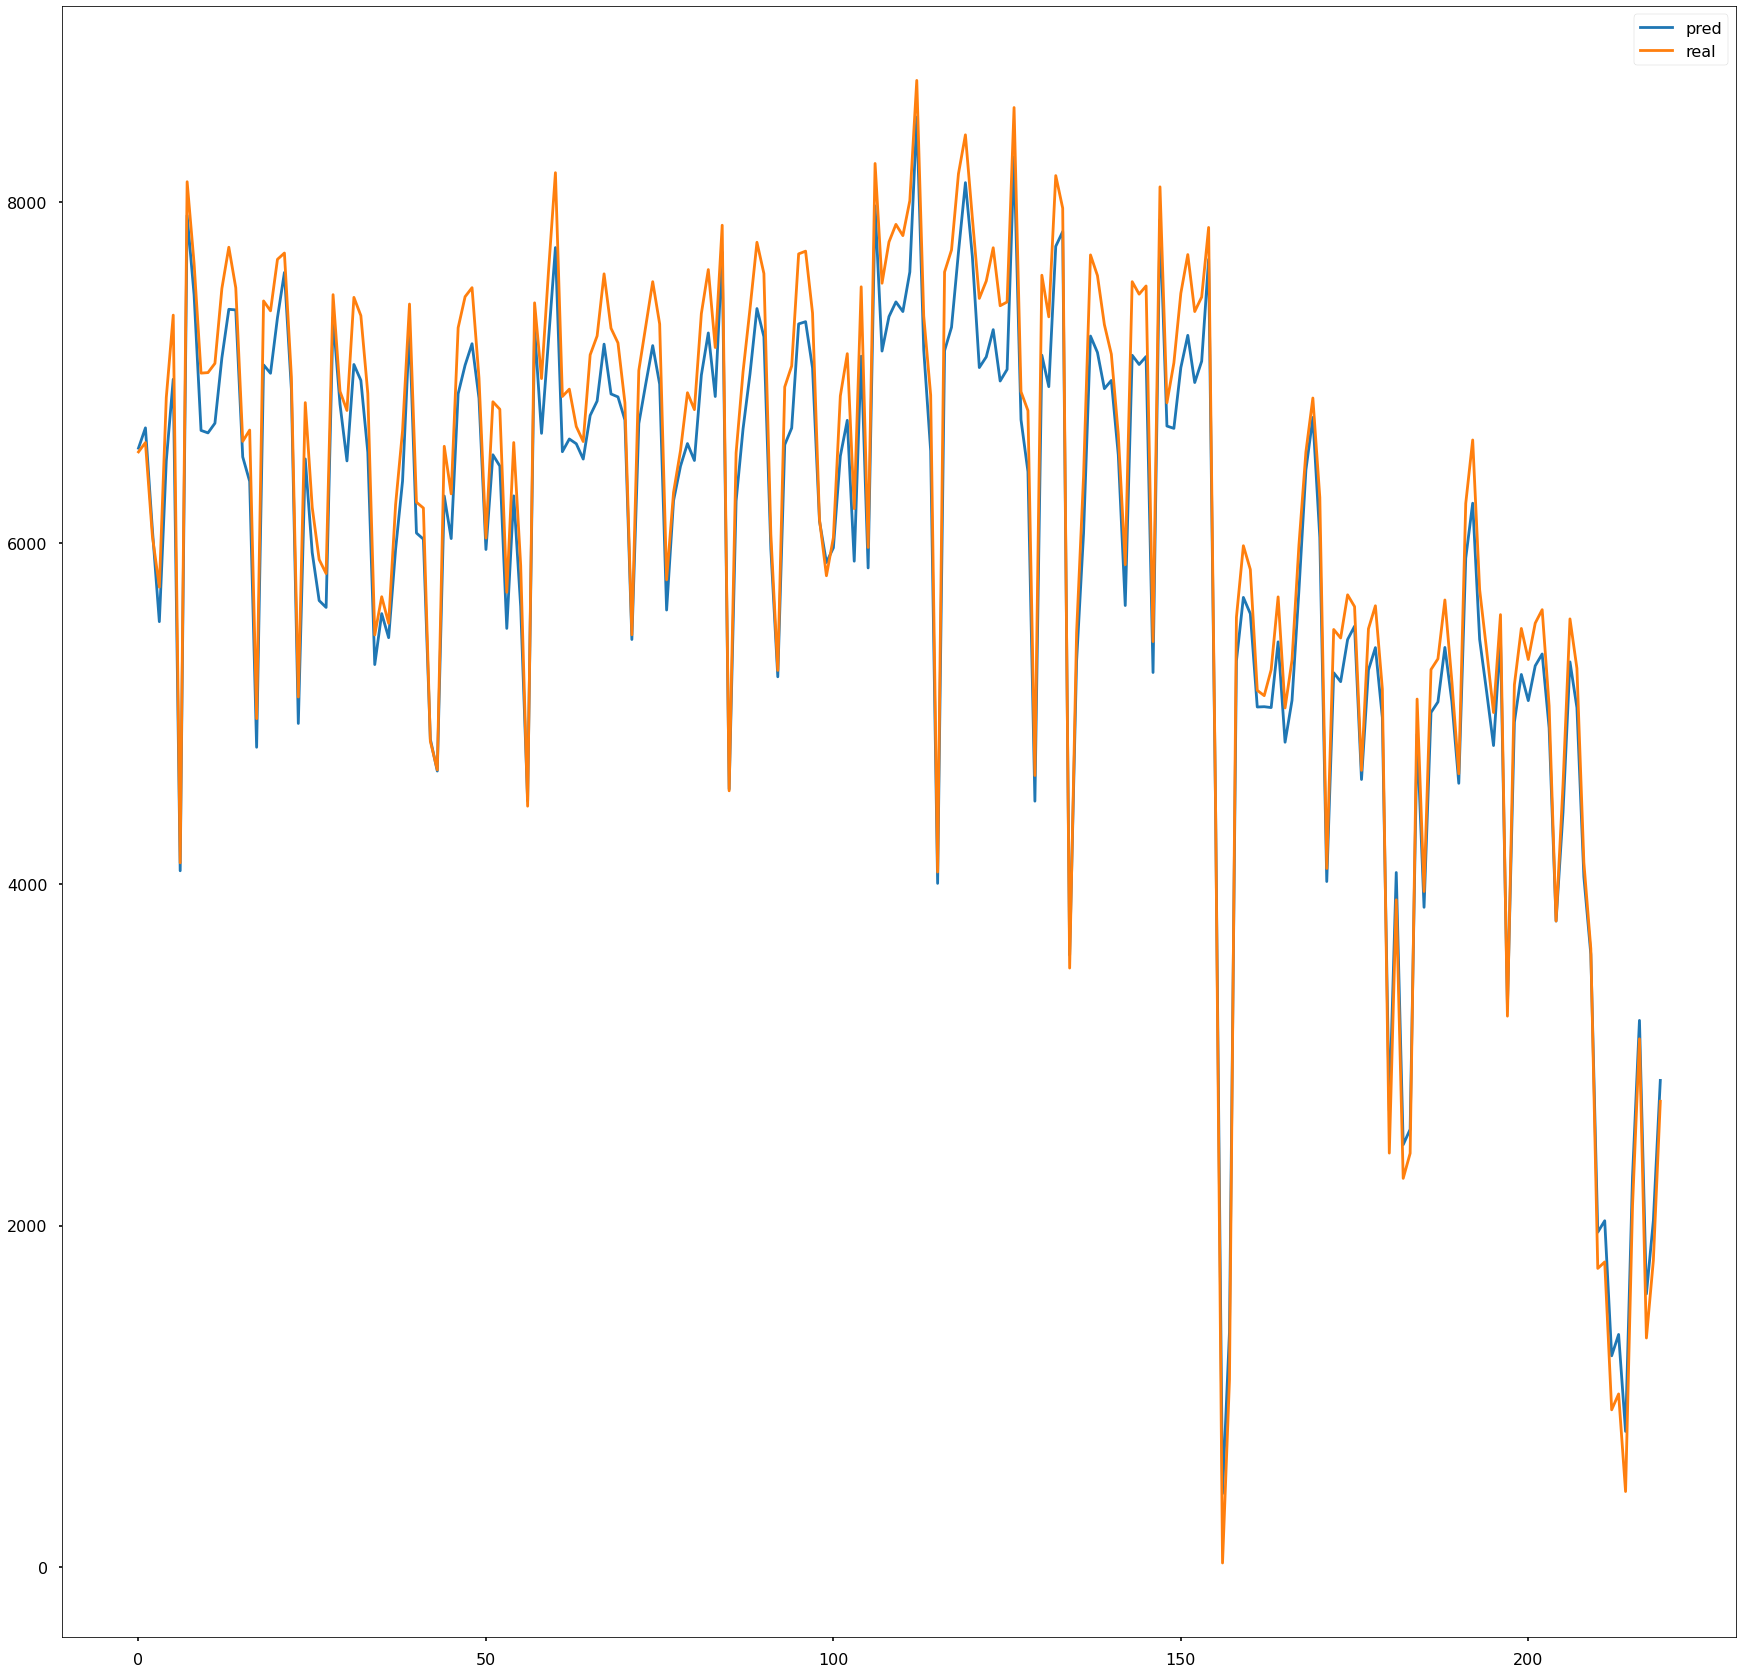

In [36]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data2.columns[:-1])

ошибка - >  575.616677617847
R - >  0.9963696430815313
                   coef
registered  5125.942398
casual      3234.720325
temp         497.516037
yr           277.294744
mnth         170.986938
workingday    77.919556
weekday       26.965436
windspeed   -174.081371
hum         -235.862503


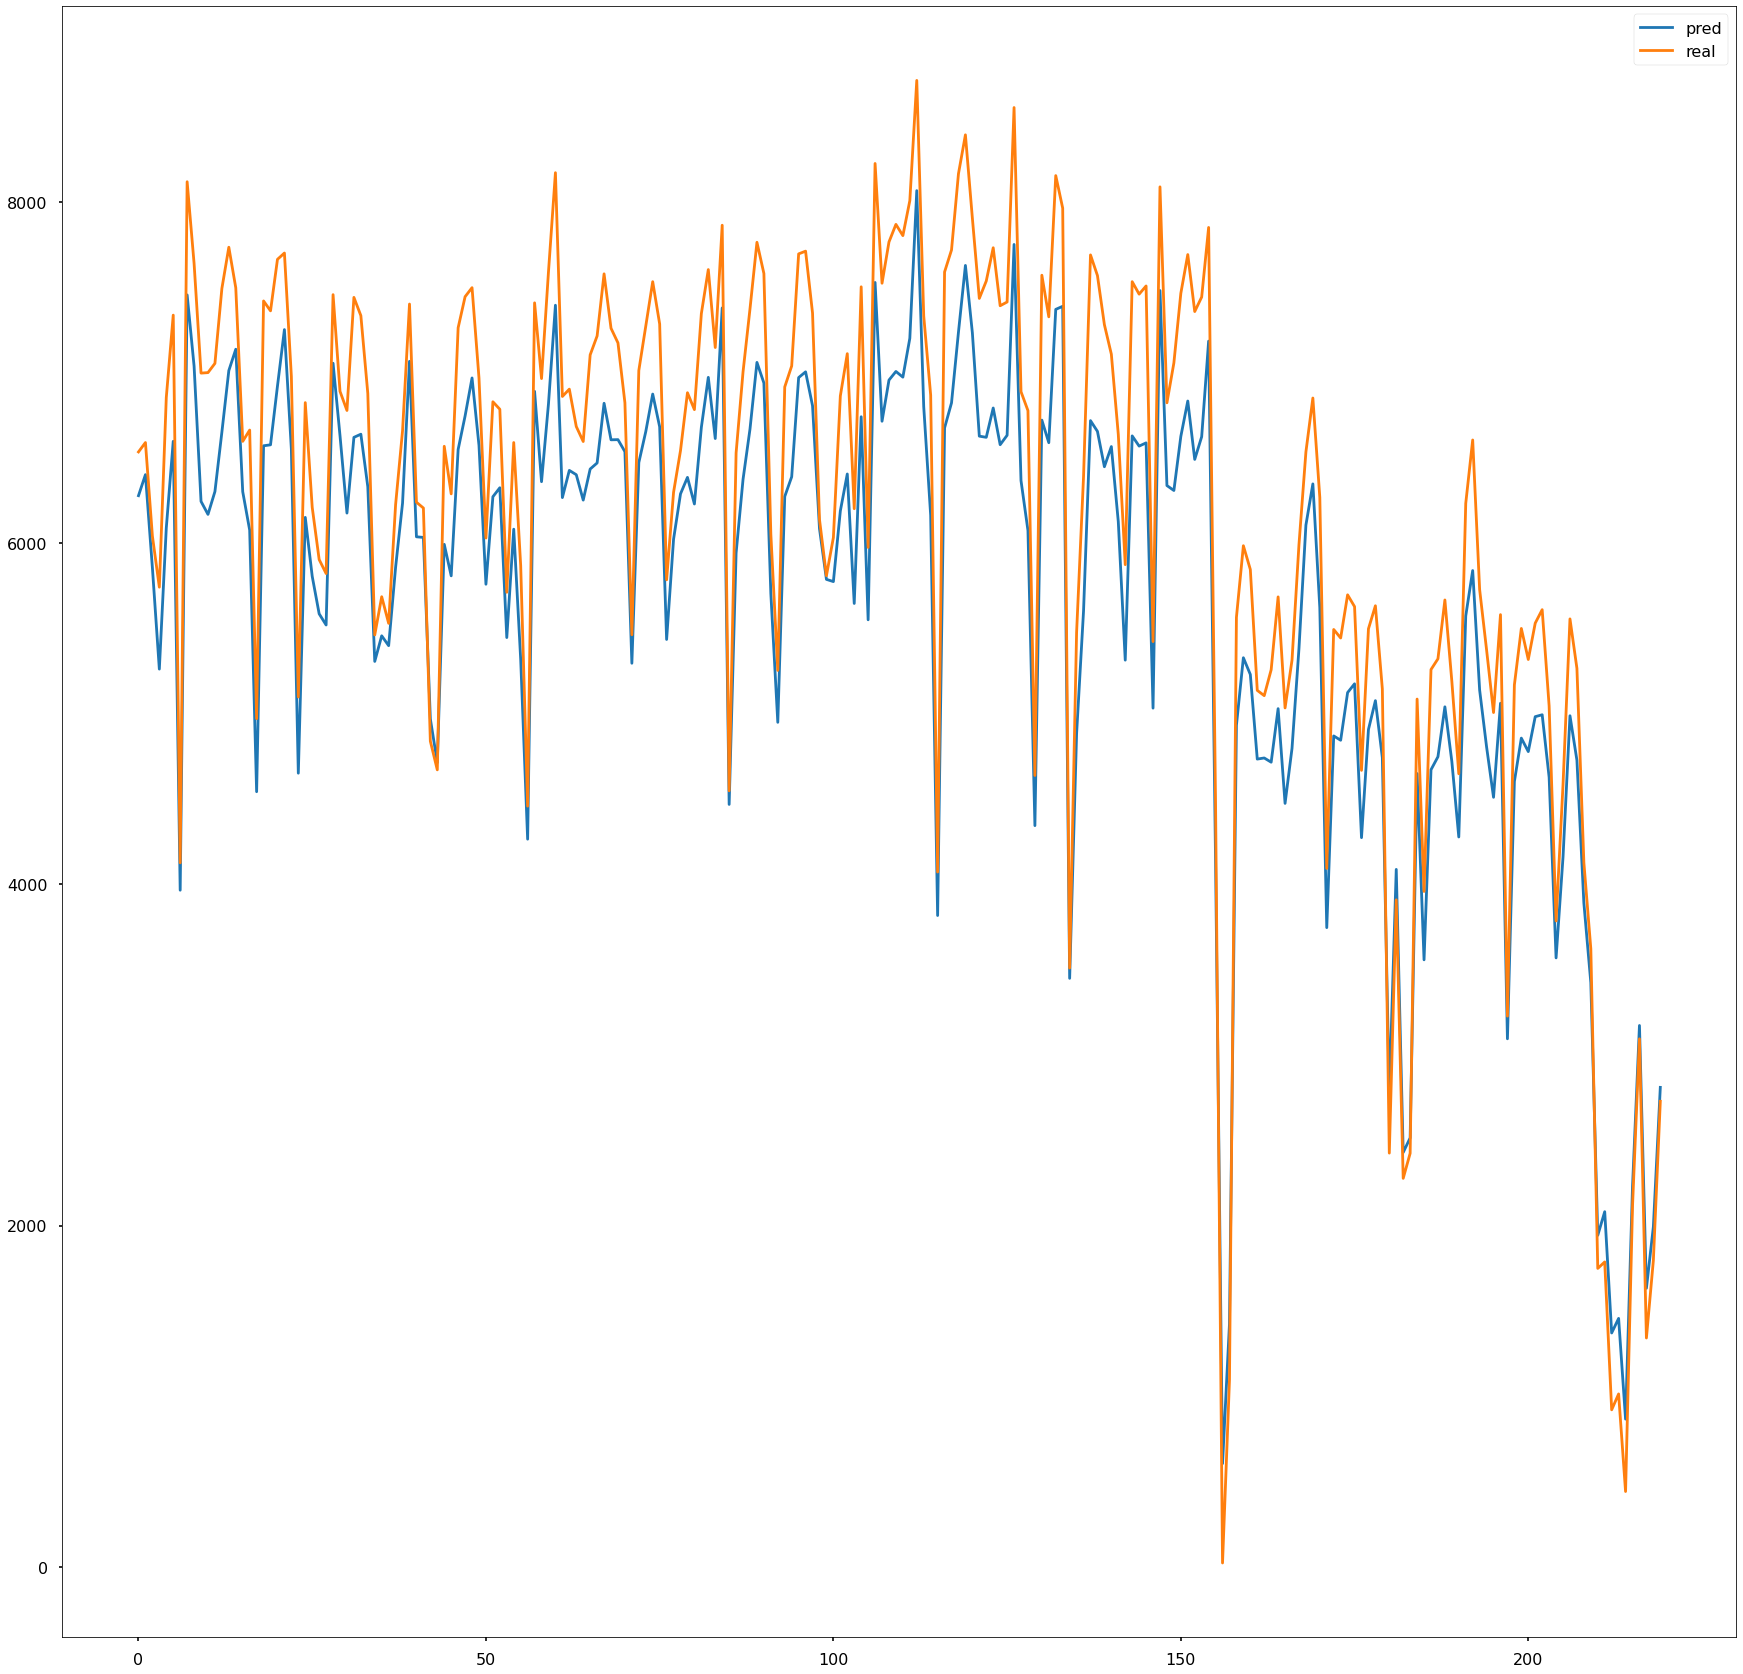

In [35]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data2.columns[:-1])

ошибка - >  313.4709924233906
R - >  0.9999440729826515
                   coef
registered  5902.797583
casual      3385.912286
temp          63.195422
yr            35.478380
mnth          22.099888
workingday    11.341919
weekday        3.287344
windspeed    -23.175101
hum          -32.352250


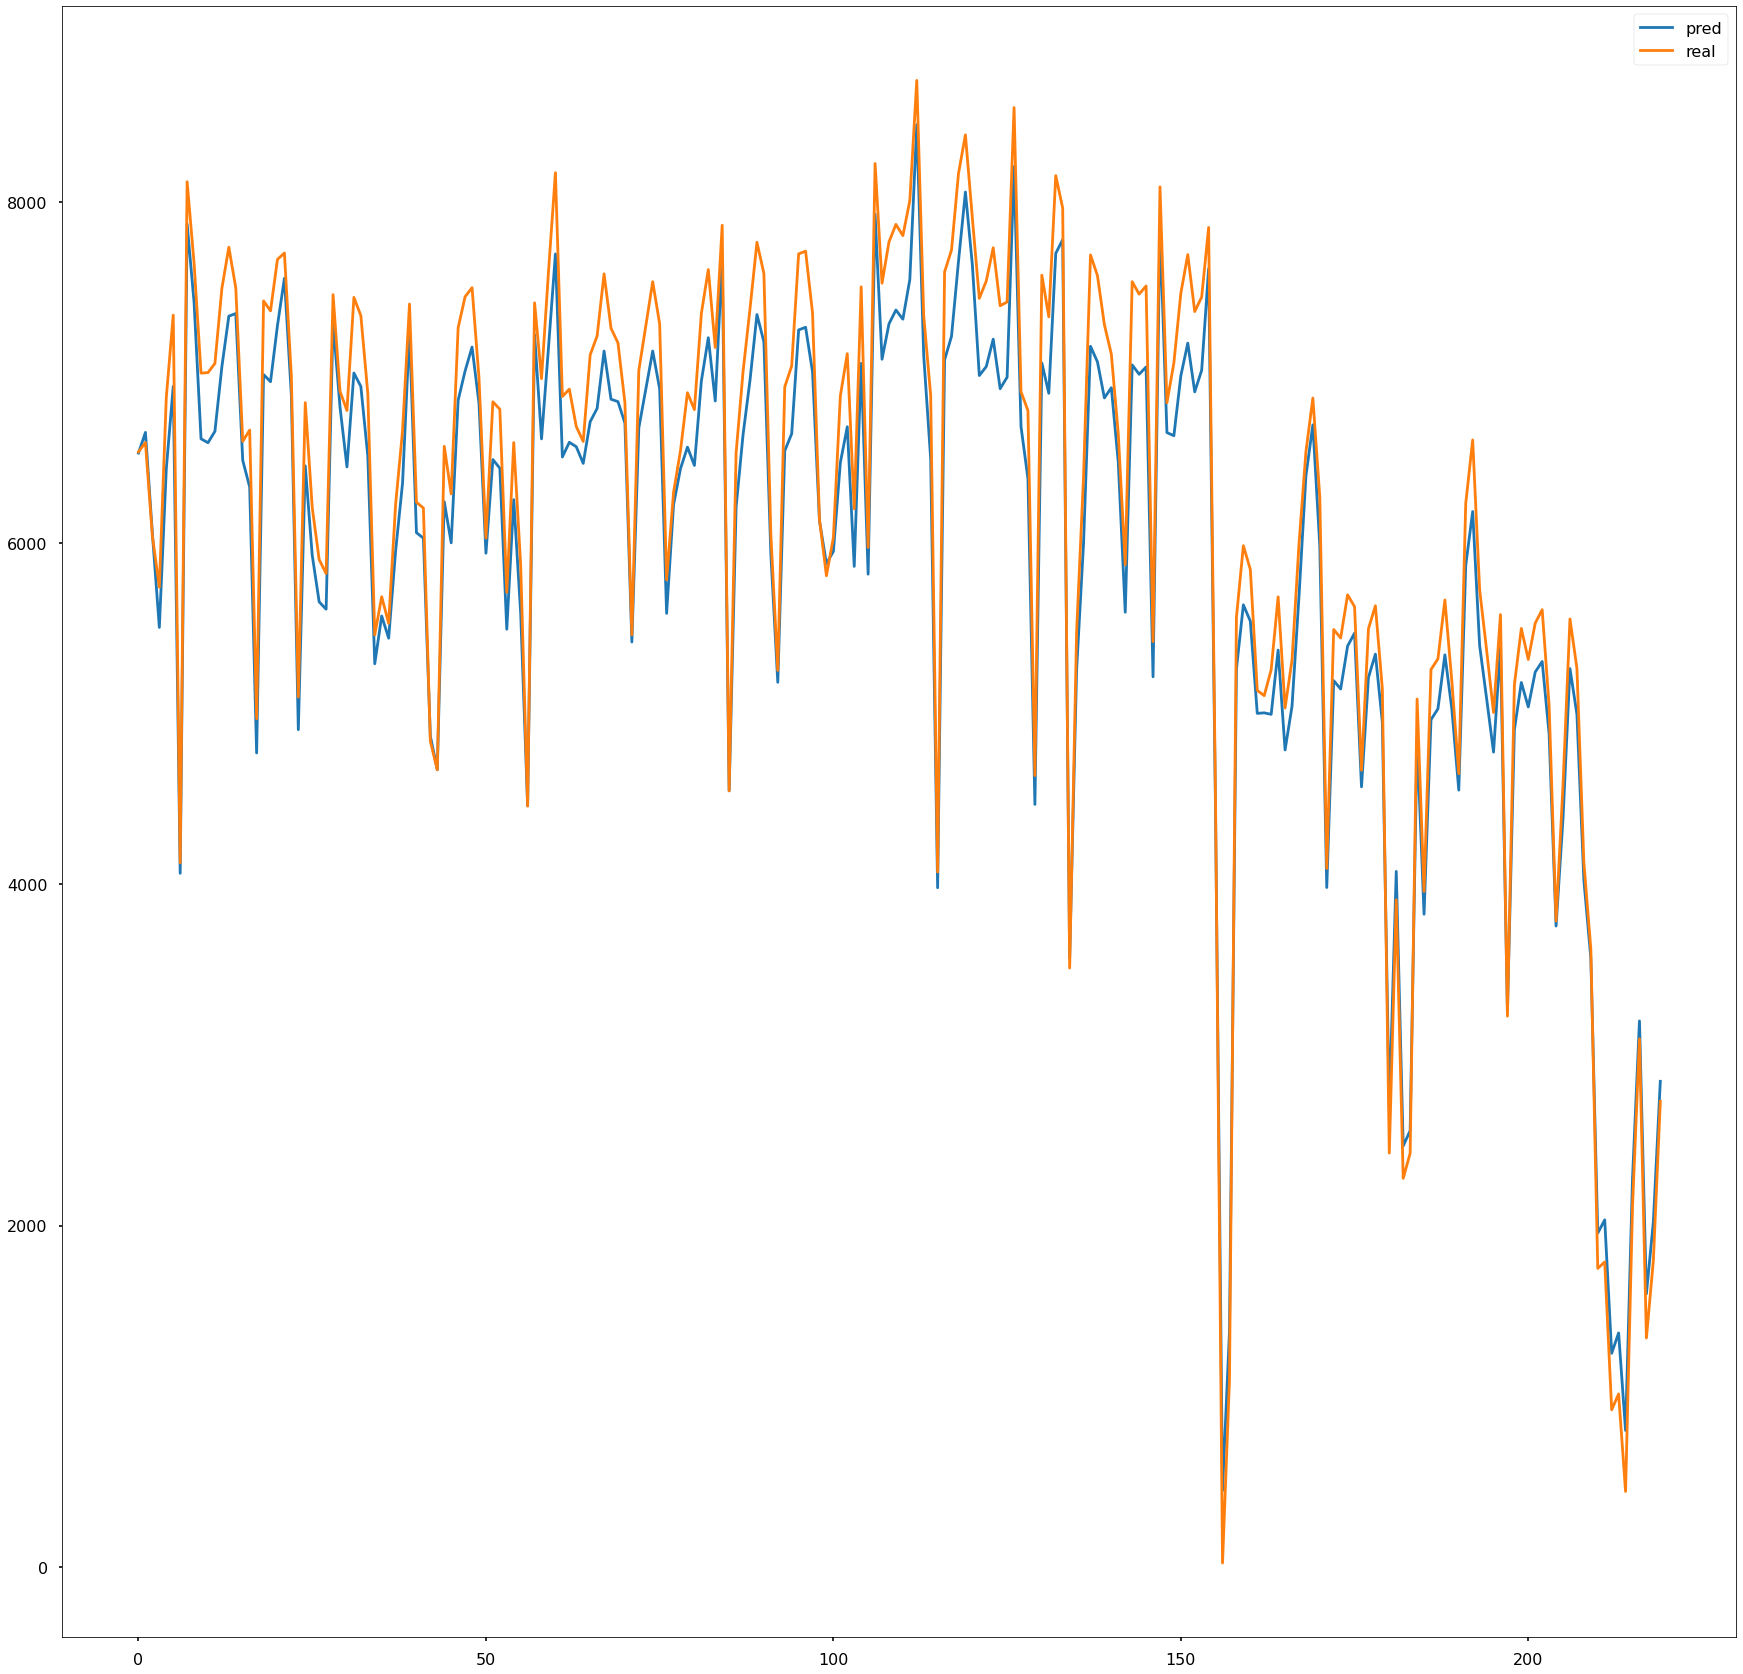

In [34]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names = data2.columns[:-1])